In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('psyco.csv')

In [ ]:
data.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


In [ ]:
data.isnull().sum()

age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill           0
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64

In [ ]:
data.dtypes

age                object
gender             object
occupation         object
line_of_work       object
time_bp             int64
time_dp             int64
travel_time       float64
easeof_online       int64
home_env            int64
prod_inc          float64
sleep_bal         float64
new_skill         float64
fam_connect       float64
relaxed           float64
self_time         float64
like_hw             int64
dislike_hw          int64
prefer             object
certaindays_hw     object
dtype: object

Transforming all ordinal attributes to categorical for descriptive analysis

In [ ]:
data['easeof_online'] = data['easeof_online'].astype('object')
data['home_env'] = data['home_env'].astype('object')
data['prod_inc'] = data['prod_inc'].astype('object')
data['sleep_bal'] = data['sleep_bal'].astype('object')
data['new_skill'] = data['new_skill'].astype('object')
data['fam_connect'] = data['fam_connect'].astype('object')
data['relaxed'] = data['relaxed'].astype('object')
data['self_time'] = data['self_time'].astype('object')
data['like_hw'] = data['like_hw'].astype('object')
data['dislike_hw'] = data['dislike_hw'].astype('object')

In [ ]:
data.describe()

,time_bp,time_dp,travel_time
count,1175.000000,1175.000000,1175.000000
mean,7.415319,7.971915,1.027660
std,2.005385,2.657007,0.713314
min,4.000000,4.000000,0.500000
25%,5.000000,5.000000,0.500000
50%,7.000000,9.000000,0.500000
75%,9.000000,9.000000,1.500000
max,12.000000,12.000000,3.000000


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
age,1175,7,19-25,345
gender,1175,3,Male,649
occupation,1175,8,Working Professional,479
line_of_work,479,8,Teaching,217
easeof_online,1175,5,1,329
home_env,1175,5,3,327
prod_inc,1175.0,5.0,0.5,302.0
sleep_bal,1175.0,5.0,-0.5,313.0
new_skill,1175.0,5.0,0.5,366.0
fam_connect,1175.0,5.0,0.5,414.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes = ['age', 'gender', 'occupation', 'line_of_work', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal', 'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw', 'dislike_hw', 'prefer', 'certaindays_hw']

for attribute in attributes:
    figsize = (10, 23) if attribute == 'occupation' else (10, 8)
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=attribute, data=data)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'Count Plot for {attribute}')
    plt.xlabel(attribute, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'count_plot_{attribute}.png', dpi=500)
    plt.close()
print("Count plots saved successfully.")

Count plots saved successfully.


Frequency table for age saved as frequency_table_age.png.

Frequency table for gender saved as frequency_table_gender.png.

Frequency table for occupation saved as frequency_table_occupation.png.

Frequency table for line_of_work saved as frequency_table_line_of_work.png.

Frequency table for easeof_online saved as frequency_table_easeof_online.png.

Frequency table for home_env saved as frequency_table_home_env.png.

Frequency table for prod_inc saved as frequency_table_prod_inc.png.

Frequency table for sleep_bal saved as frequency_table_sleep_bal.png.

Frequency table for new_skill saved as frequency_table_new_skill.png.

Frequency table for fam_connect saved as frequency_table_fam_connect.png.

Frequency table for relaxed saved as frequency_table_relaxed.png.

Frequency table for self_time saved as frequency_table_self_time.png.

Frequency table for like_hw saved as frequency_table_like_hw.png.

Frequency table for dislike_hw saved as frequency_table_dislike_hw.png.

Frequency tabl

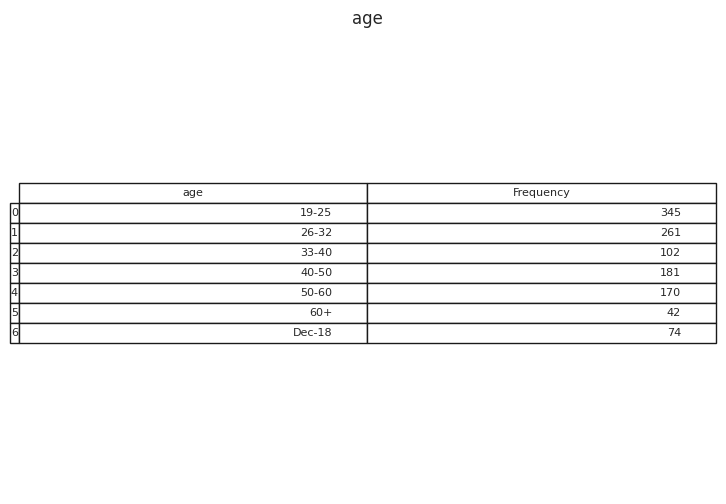

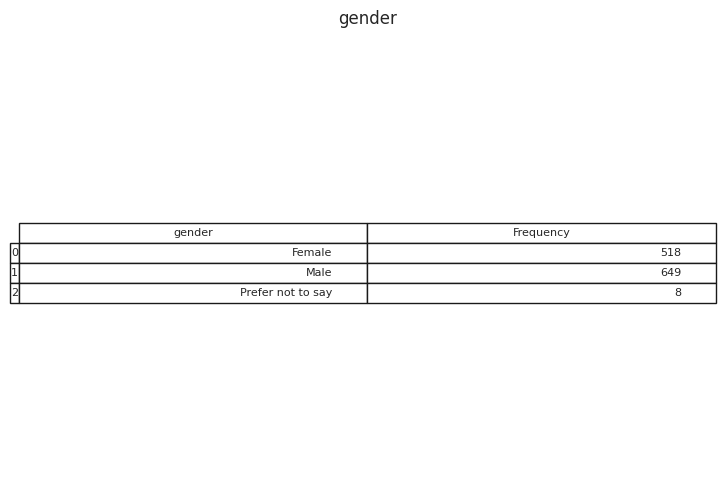

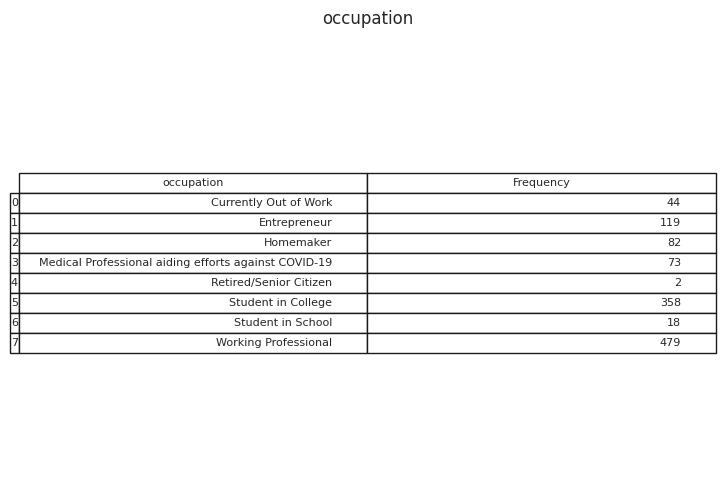

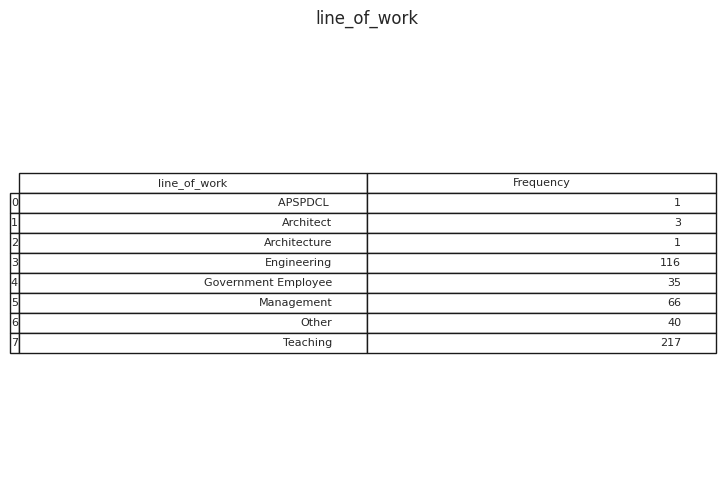

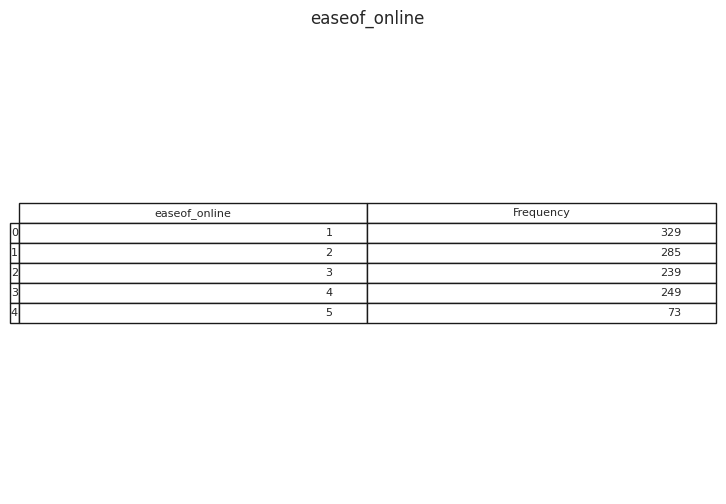

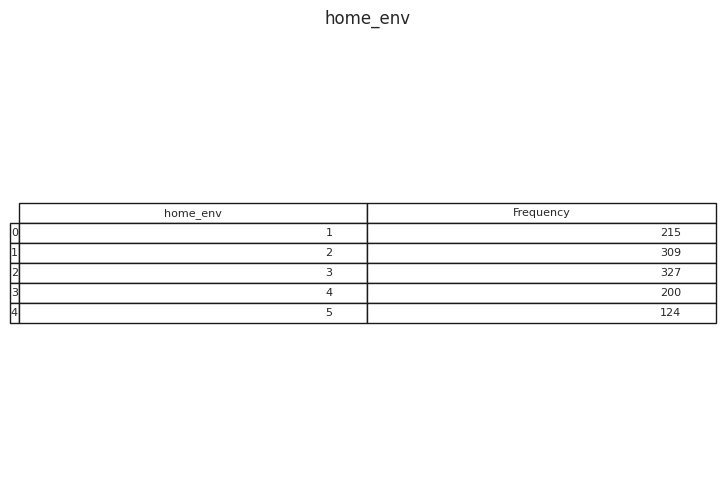

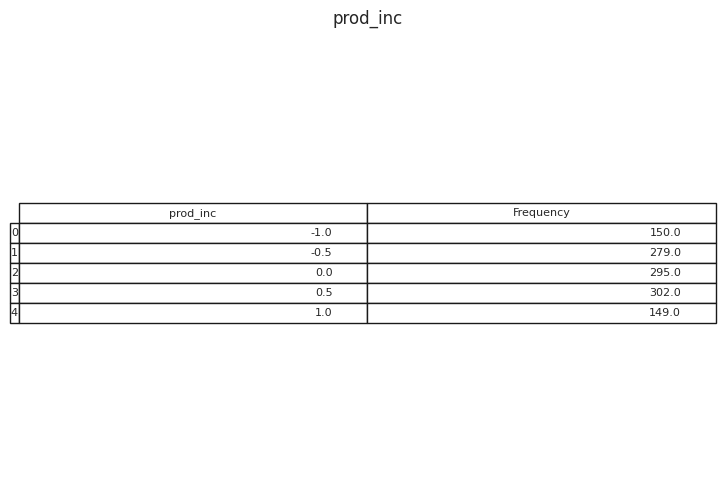

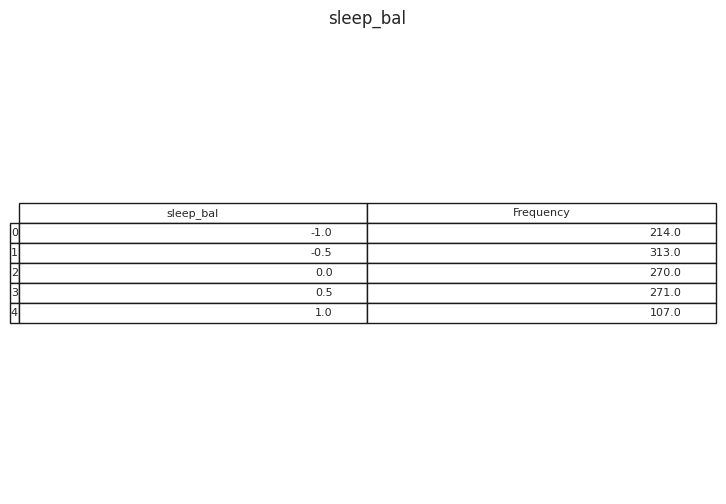

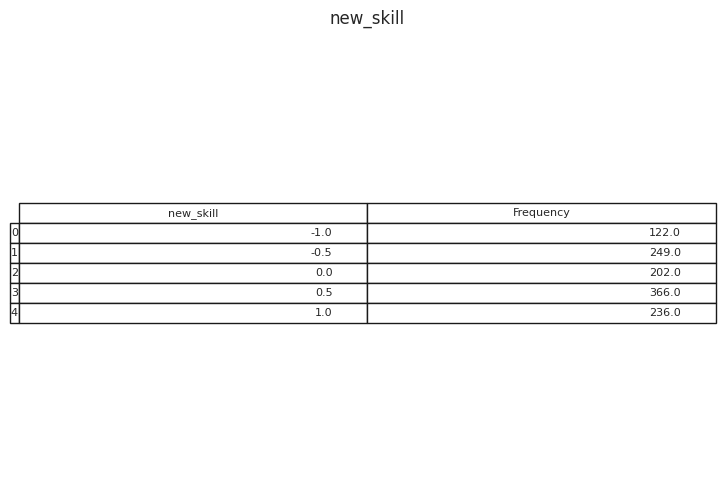

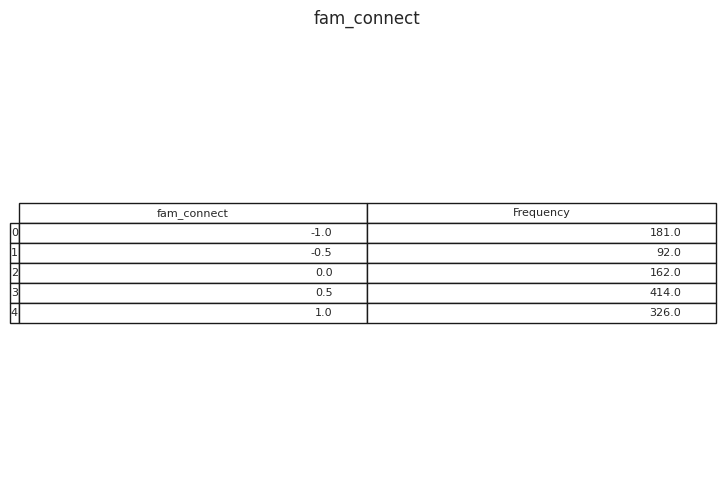

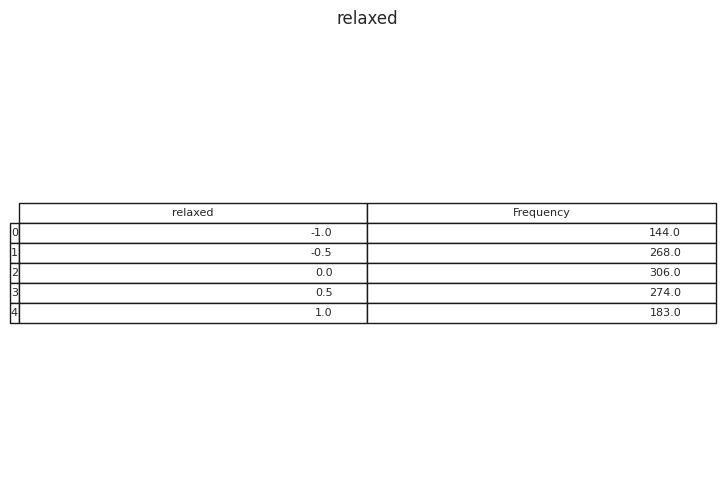

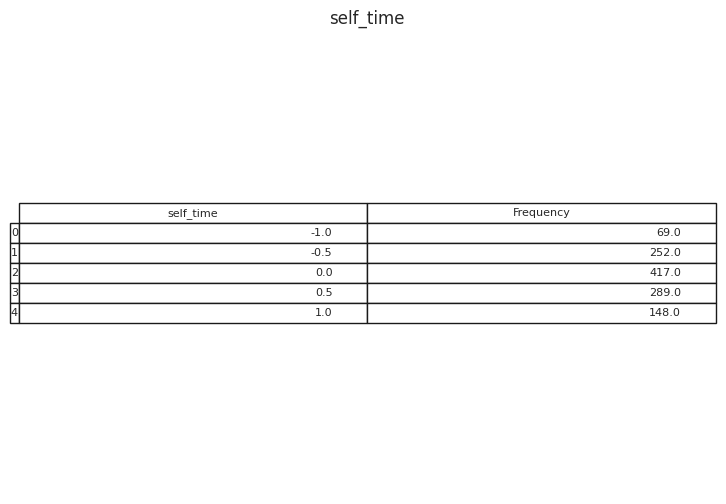

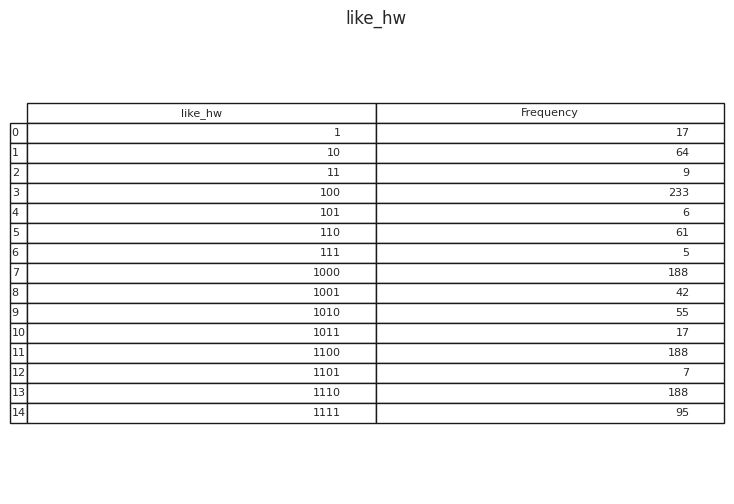

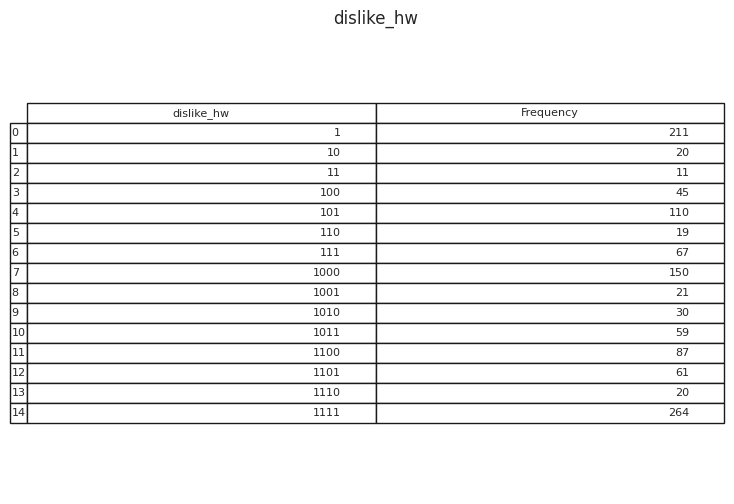

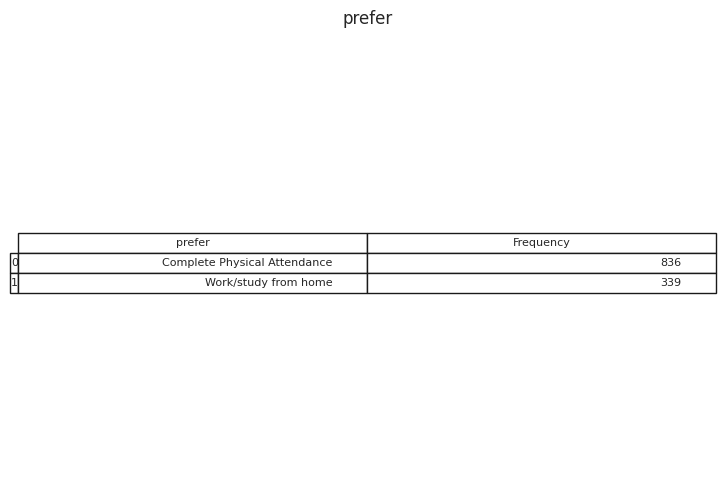

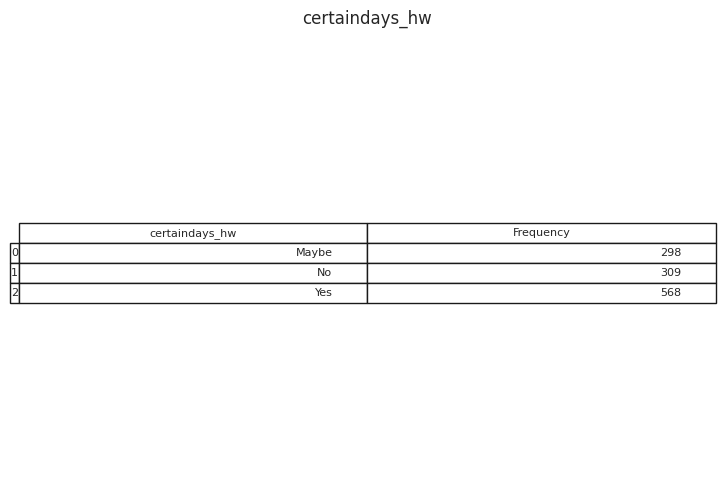

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
attributes = ['age', 'gender', 'occupation', 'line_of_work', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal', 'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw', 'dislike_hw', 'prefer', 'certaindays_hw']
for attribute in attributes:
    freq_table = pd.crosstab(index=data[attribute], columns="Frequency")
    freq_table.reset_index(inplace=True)
    fig, ax = plt.subplots(figsize=(7.5, 6))
    ax.axis('off')
    tb = table(ax, freq_table, loc='center')
    plt.title(attribute)
    image_filename = f'frequency_table_{attribute}.png'
    tb.auto_set_font_size(False)
    tb.set_fontsize(8)
    tb.scale(1.2, 1.2)
    plt.savefig(image_filename, bbox_inches='tight', dpi=500)
    print(f"Frequency table for {attribute} saved as {image_filename}.\n")

In [ ]:
data = pd.read_csv('psyco.csv')

In [ ]:
data.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw'],
      dtype='object')

In [ ]:
data['age'].value_counts()

19-25     345
26-32     261
40-50     181
50-60     170
33-40     102
Dec-18     74
60+        42
Name: age, dtype: int64

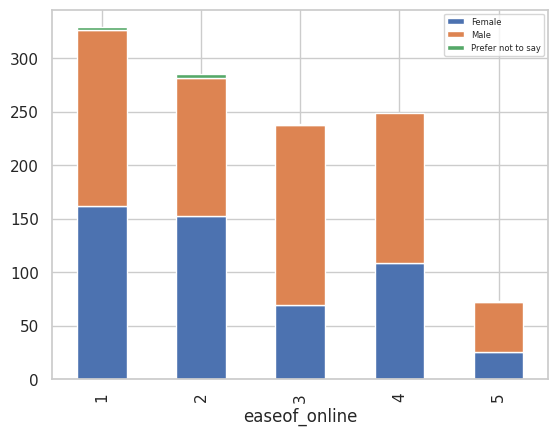

gender         Female  Male  Prefer not to say
easeof_online                                 
1                 162   164                  3
2                 153   129                  3
3                  69   169                  1
4                 109   140                  0
5                  25    47                  1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

c_ct = pd.crosstab(data['easeof_online'], data['gender'])
graph = c_ct.plot(kind='bar', stacked=True)
graph.legend(fontsize=6)
plt.savefig('GenderXeaseOf.png', dpi=400)
plt.show()
print(c_ct)

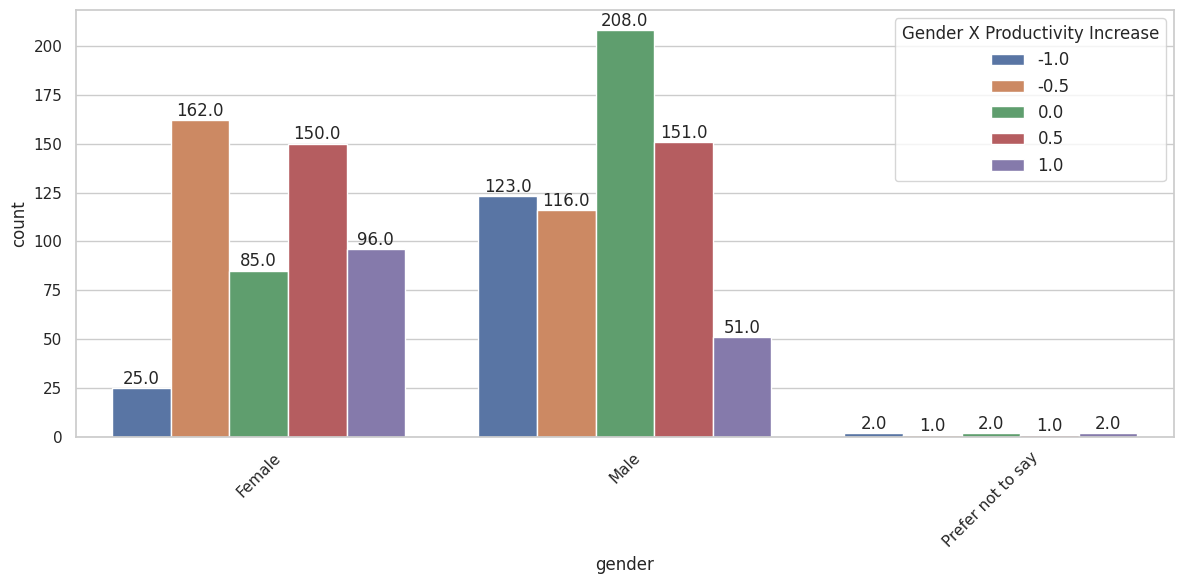

prod_inc           -1.0  -0.5   0.0   0.5   1.0
gender                                         
Female               25   162    85   150    96
Male                123   116   208   151    51
Prefer not to say     2     1     2     1     2


In [ ]:
gender_order = sorted(data['gender'].unique())

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(data=data, x='gender', hue='prod_inc', order=gender_order)

for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center", va="bottom")

plt.xticks(rotation=45)
legend = plt.legend(title='Gender X Productivity Increase', fontsize='12')
legend.get_title().set_fontsize('12')
plt.tight_layout()
plt.savefig('GenderXProductivity.png', dpi=400)
plt.show()

counts_table = pd.crosstab(data['gender'], data['prod_inc'])
print(counts_table)

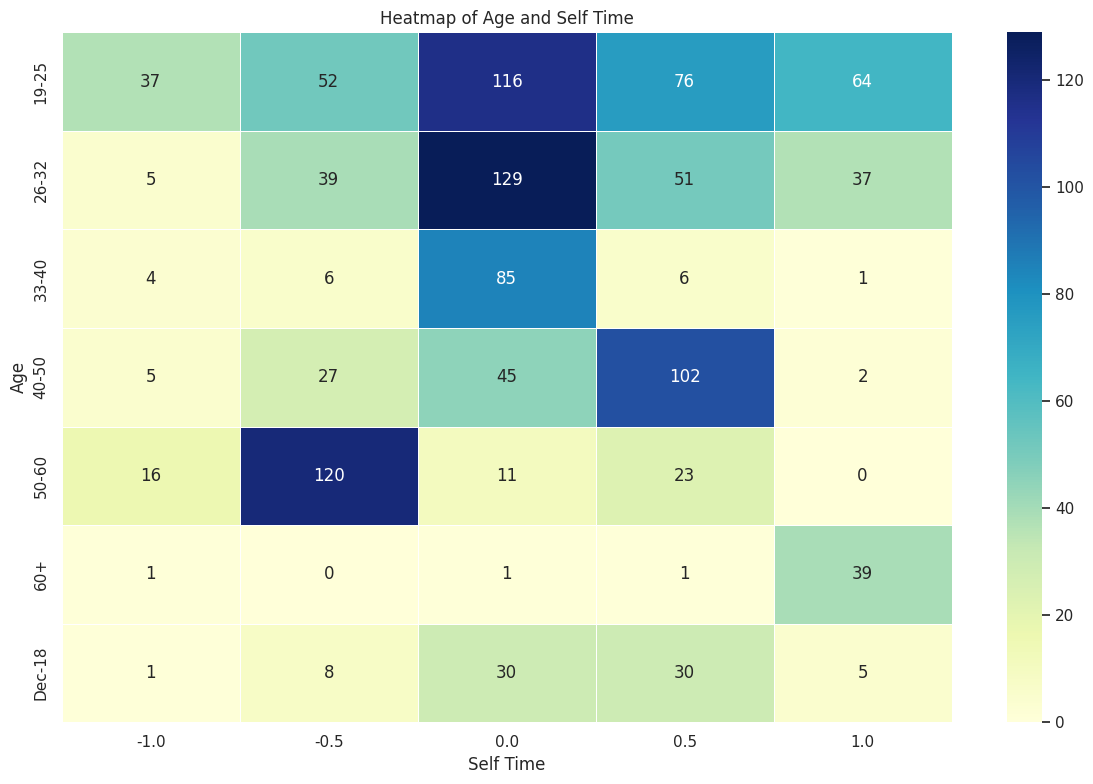

self_time  -1.0  -0.5   0.0   0.5   1.0
age                                    
19-25        37    52   116    76    64
26-32         5    39   129    51    37
33-40         4     6    85     6     1
40-50         5    27    45   102     2
50-60        16   120    11    23     0
60+           1     0     1     1    39
Dec-18        1     8    30    30     5


In [ ]:
plt.figure(figsize=(12, 8))
heatmap_data = pd.crosstab(data['age'], data['self_time'])
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Heatmap of Age and Self Time')
plt.xlabel('Self Time')
plt.ylabel('Age')
plt.tight_layout()

plt.savefig('heatmap_age_self_time.png', dpi=400)

plt.show()

crosstab_results = pd.crosstab(data['age'], data['self_time'])
print(crosstab_results)

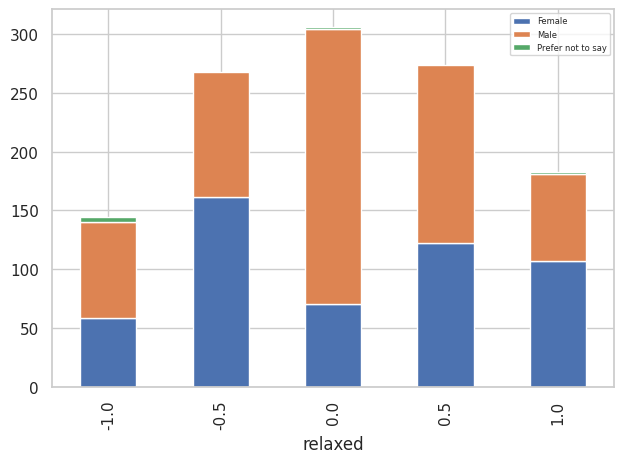

gender   Female  Male  Prefer not to say
relaxed                                 
-1.0         58    82                  4
-0.5        161   107                  0
 0.0         70   234                  2
 0.5        122   152                  0
 1.0        107    74                  2


In [ ]:
c_ct = pd.crosstab(data['relaxed'], data['gender'])
graph = c_ct.plot(kind='bar', stacked=True)
graph.legend(fontsize=6)
plt.tight_layout()
plt.savefig('GenderXLike_hw.png', dpi=400)
plt.show()
print(c_ct)

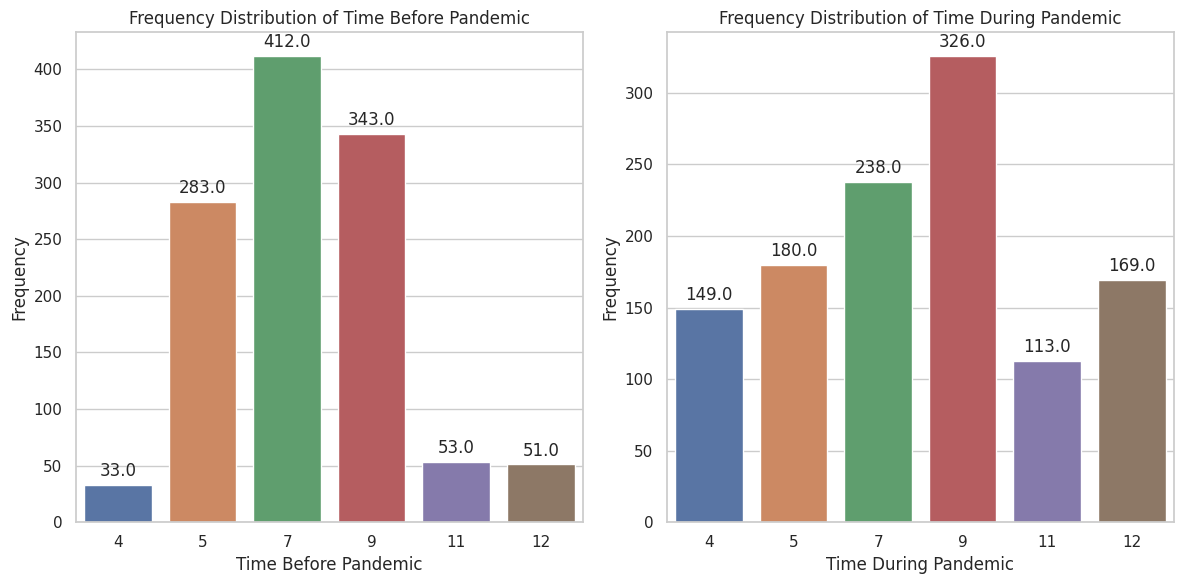

Sum of all hours before pandemic: 8713
Sum of all hours during pandemic: 9367


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='time_bp', data=data)
plt.title('Frequency Distribution of Time Before Pandemic')
plt.xlabel('Time Before Pandemic')
plt.ylabel('Frequency')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='time_dp', data=data)
plt.title('Frequency Distribution of Time During Pandemic')
plt.xlabel('Time During Pandemic')
plt.ylabel('Frequency')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.savefig('frequency_distribution_time_bp_time_dp.png', dpi=400)

plt.show()

sum_before = data['time_bp'].sum()
sum_during = data['time_dp'].sum()
print(f"Sum of all hours before pandemic: {sum_before}")
print(f"Sum of all hours during pandemic: {sum_during}")


In [ ]:
data.isnull().sum()

age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill           0
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64

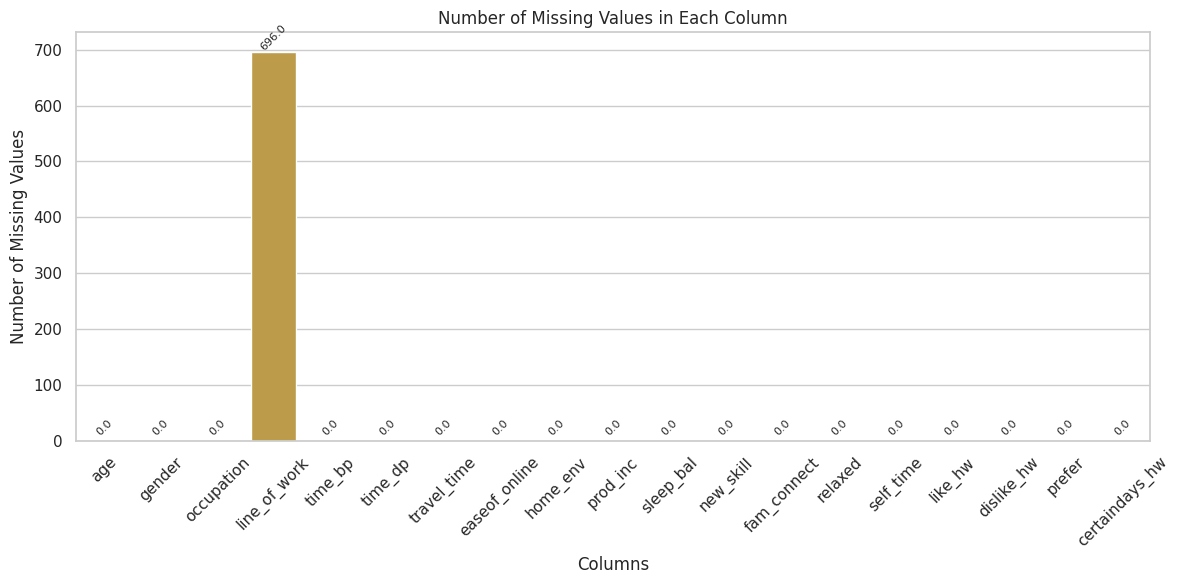

In [ ]:
missing_values = data.isnull().sum()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing_values.index, y=missing_values.values)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, rotation=45)

plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('missing_values_bar_chart.png', dpi=400)
plt.show()

In [ ]:
data['line_of_work'].value_counts()

Teaching               217
Engineering            116
Management              66
Other                   40
Government Employee     35
Architect                3
APSPDCL                  1
Architecture             1
Name: line_of_work, dtype: int64

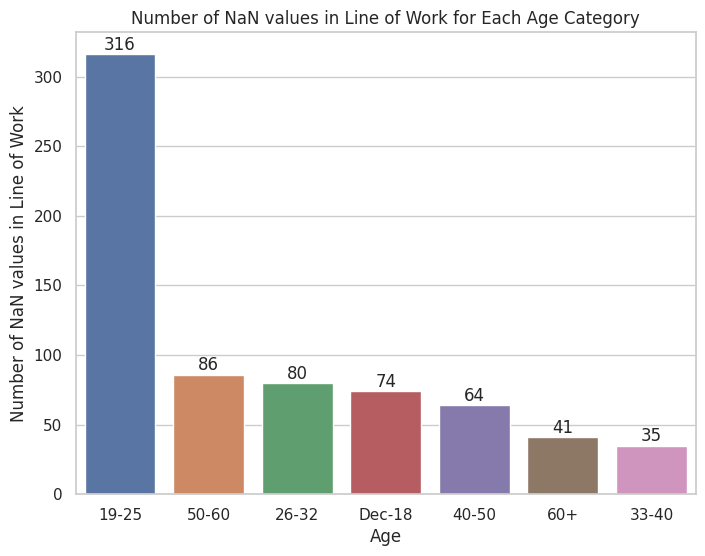

In [ ]:
nan_df = data[data['line_of_work'].isna()]

nan_age_counts = nan_df['age'].value_counts().reset_index()
nan_age_counts.columns = ['age', 'nan_count']

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='age', y='nan_count', data=nan_age_counts)
plt.xlabel('Age')
plt.ylabel('Number of NaN values in Line of Work')
plt.title('Number of NaN values in Line of Work for Each Age Category')

for index, value in enumerate(nan_age_counts['nan_count']):
    bar_plot.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.savefig('Nan_values_per_age.png', dpi=400)
plt.show()


In [ ]:
data['line_of_work'].fillna('other', inplace=True)
print(data['line_of_work'].value_counts())

other                  696
Teaching               217
Engineering            116
Management              66
Other                   40
Government Employee     35
Architect                3
APSPDCL                  1
Architecture             1
Name: line_of_work, dtype: int64


In [ ]:
data.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw'],
      dtype='object')

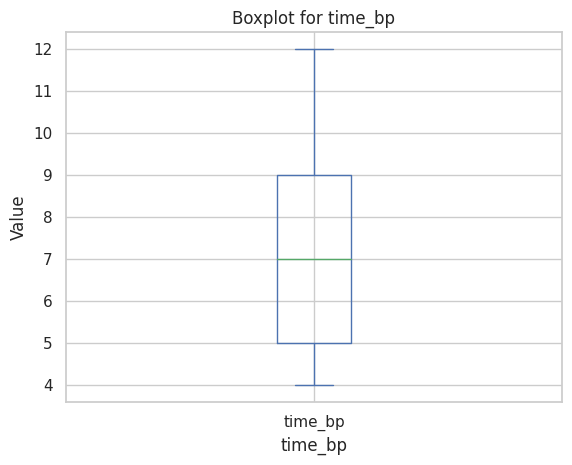

In [ ]:
boxplot = data['time_bp'].plot(kind='box')
plt.title('Boxplot for time_bp')
plt.xlabel('time_bp')
plt.ylabel('Value')
plt.savefig('boxplot_time_bp.png', dpi=400)
plt.show()

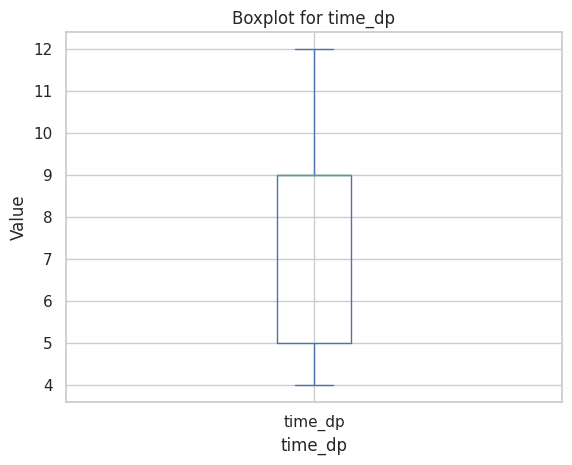

In [ ]:
boxplot_dp = data['time_dp'].plot(kind='box')
plt.title('Boxplot for time_dp')
plt.xlabel('time_dp')
plt.ylabel('Value')
plt.savefig('boxplot_time_dp.png', dpi=400)
plt.show()

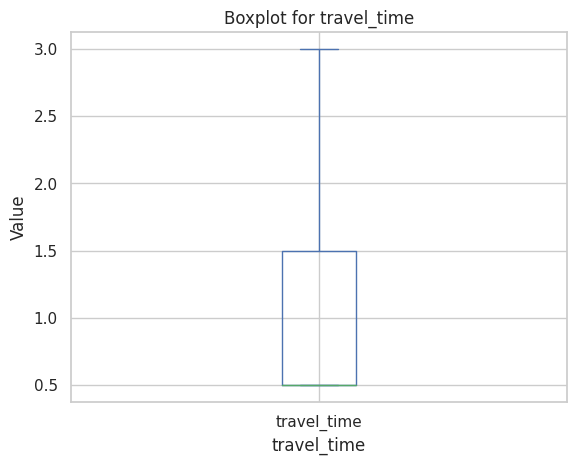

In [ ]:
boxplot_travel_time = data['travel_time'].plot(kind='box')
plt.title('Boxplot for travel_time')
plt.xlabel('travel_time')
plt.ylabel('Value')
plt.savefig('boxplot_travel_time.png', dpi=400)
plt.show()

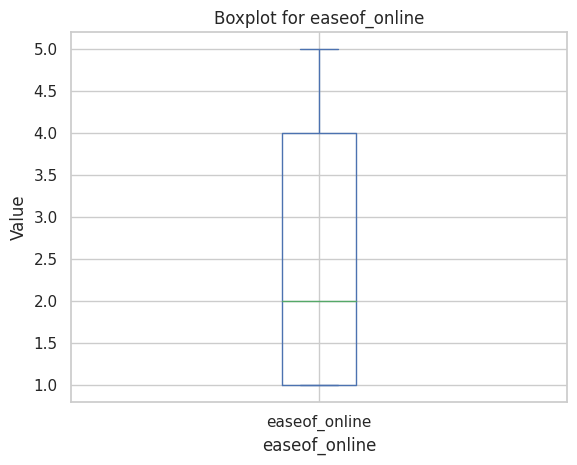

In [ ]:
boxplot_travel_time = data['easeof_online'].plot(kind='box')
plt.title('Boxplot for easeof_online')
plt.xlabel('easeof_online')
plt.ylabel('Value')
plt.savefig('boxplot_easeof_online.png', dpi=400)
plt.show()

<Axes: >

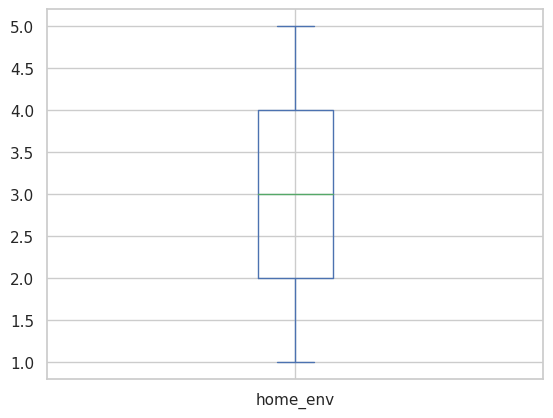

In [ ]:
data['home_env'].plot(kind='box')

<Axes: >

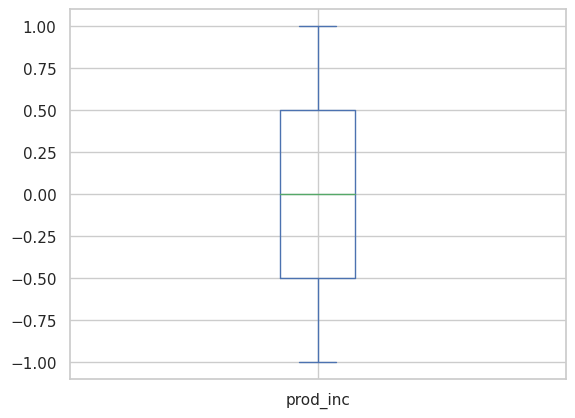

In [ ]:
data['prod_inc'].plot(kind='box')

<Axes: >

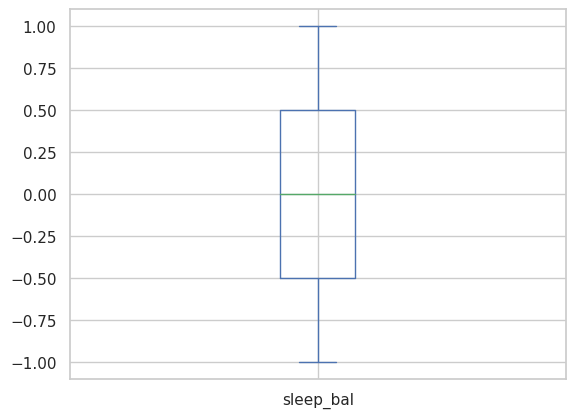

In [ ]:
data['sleep_bal'].plot(kind='box')

<Axes: >

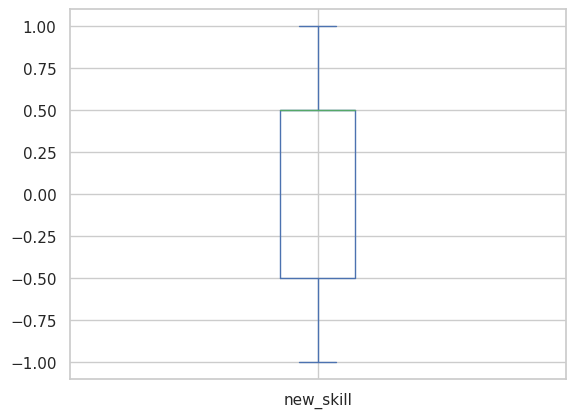

In [ ]:
data['new_skill'].plot(kind='box')

<Axes: >

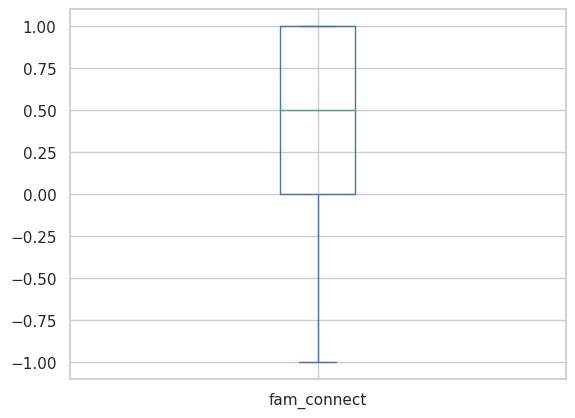

In [ ]:
data['fam_connect'].plot(kind='box')

<Axes: >

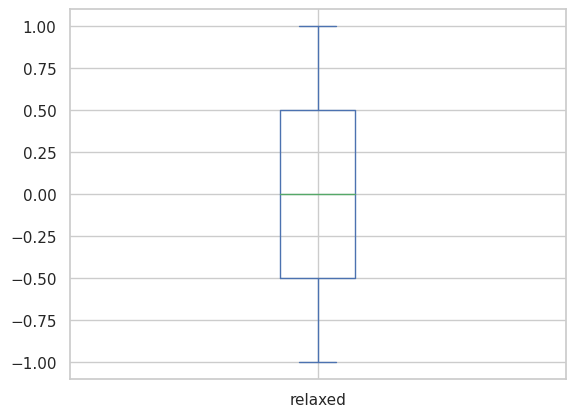

In [ ]:
data['relaxed'].plot(kind='box')

<Axes: >

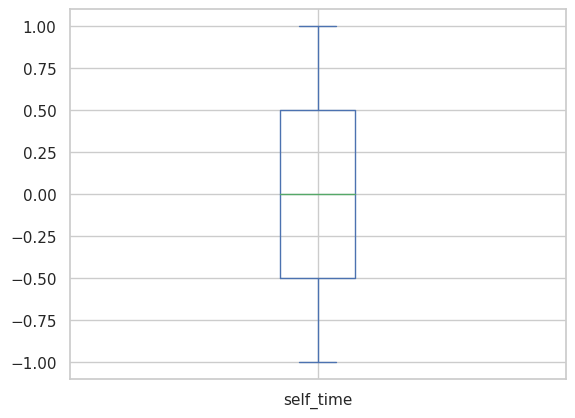

In [ ]:
data['self_time'].plot(kind='box')

<Axes: >

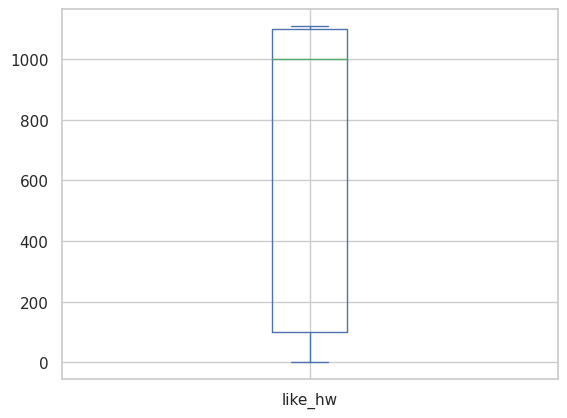

In [ ]:
data['like_hw'].plot(kind='box')

<Axes: >

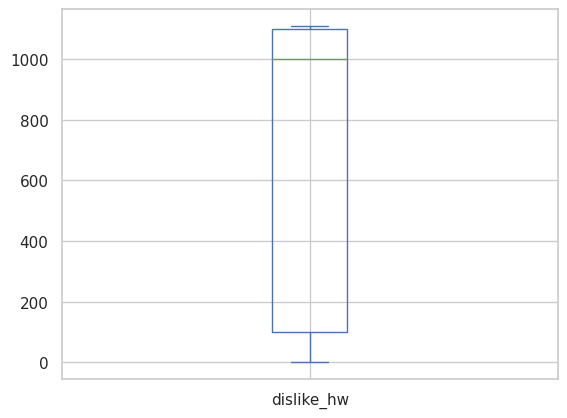

In [ ]:
data['dislike_hw'].plot(kind='box')

In [ ]:
for column in data.columns:
    print(f"Attribute: {column}")
    print(data[column].value_counts())
    print("\n")

Attribute: age
19-25     345
26-32     261
40-50     181
50-60     170
33-40     102
Dec-18     74
60+        42
Name: age, dtype: int64


Attribute: gender
Male                 649
Female               518
Prefer not to say      8
Name: gender, dtype: int64


Attribute: occupation
Working Professional                                    479
Student in College                                      358
Entrepreneur                                            119
Homemaker                                                82
Medical Professional aiding efforts against COVID-19     73
Currently Out of Work                                    44
Student in School                                        18
Retired/Senior Citizen                                    2
Name: occupation, dtype: int64


Attribute: line_of_work
other                  696
Teaching               217
Engineering            116
Management              66
Other                   40
Government Employee     35
Architect         

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['age'] = LE.fit_transform(data['age'])
data['gender'] = LE.fit_transform(data['gender'])
data['occupation'] = LE.fit_transform(data['occupation'])
data['line_of_work'] = LE.fit_transform(data['line_of_work'])
data['like_hw'] = LE.fit_transform(data['like_hw'])
data['dislike_hw'] = LE.fit_transform(data['dislike_hw'])
data['prefer'] = LE.fit_transform(data['prefer'])
data['certaindays_hw'] = LE.fit_transform(data['certaindays_hw'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['age', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw']

scaler = MinMaxScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

print(data.head())

   age  gender  occupation  line_of_work  time_bp  time_dp  travel_time  \
0  0.0       1    0.714286           1.0    0.375    0.125          0.0   
1  1.0       1    0.857143           1.0    0.375    0.875          0.0   
2  0.0       1    0.714286           1.0    0.375    0.375          0.4   
3  0.0       1    0.714286           1.0    0.375    0.375          0.4   
4  0.0       0    0.714286           1.0    0.375    0.375          0.4   

   easeof_online  home_env  prod_inc  sleep_bal  new_skill  fam_connect  \
0           0.50      0.50      0.50       0.50       0.75         1.00   
1           0.75      0.25      0.25       0.75       0.00         1.00   
2           0.25      0.25      1.00       0.50       0.75         0.75   
3           0.50      0.00      0.50       1.00       0.75         0.50   
4           0.25      0.25      0.50       0.50       0.50         0.50   

   relaxed  self_time   like_hw  dislike_hw  prefer  certaindays_hw  
0     0.25       0.25  0.214

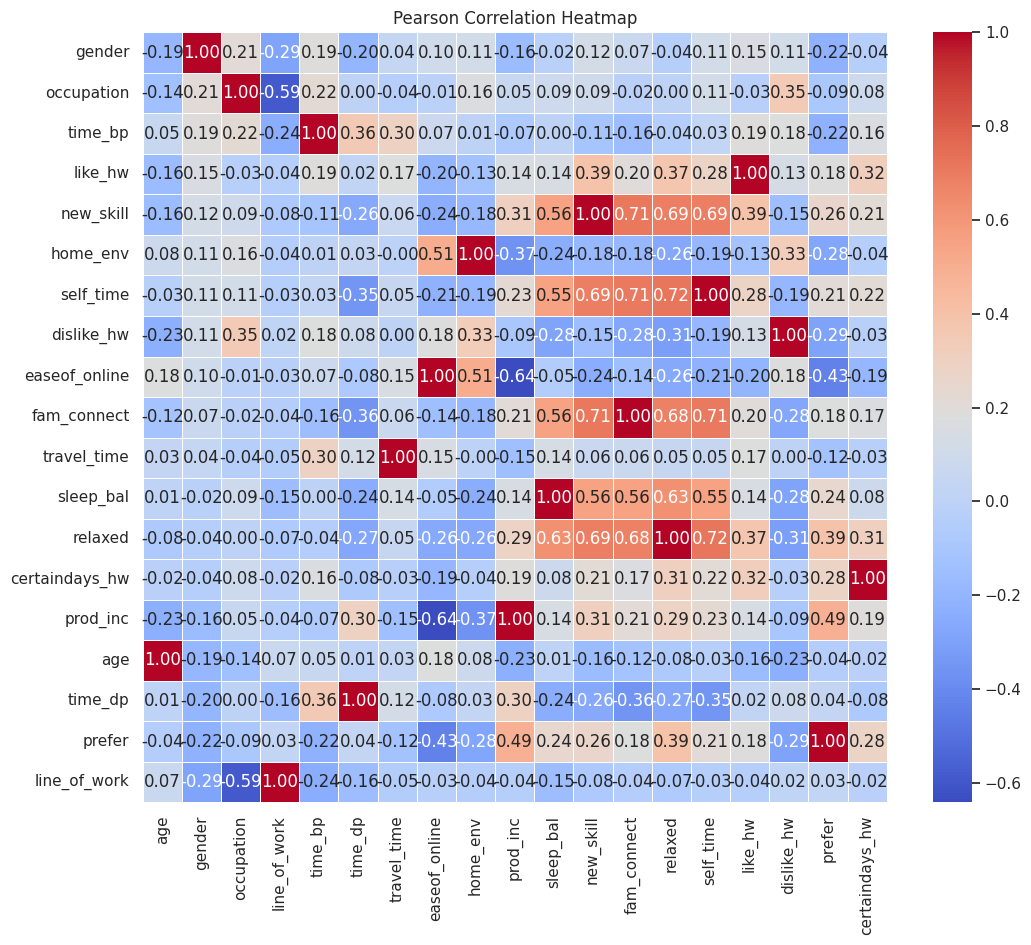

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pearson_corr = data.corr(method='pearson')
sorted_corr = pearson_corr.sort_values(by='gender', axis=0, ascending=False)
plt.figure(figsize=(12, 10))
sns.heatmap(sorted_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

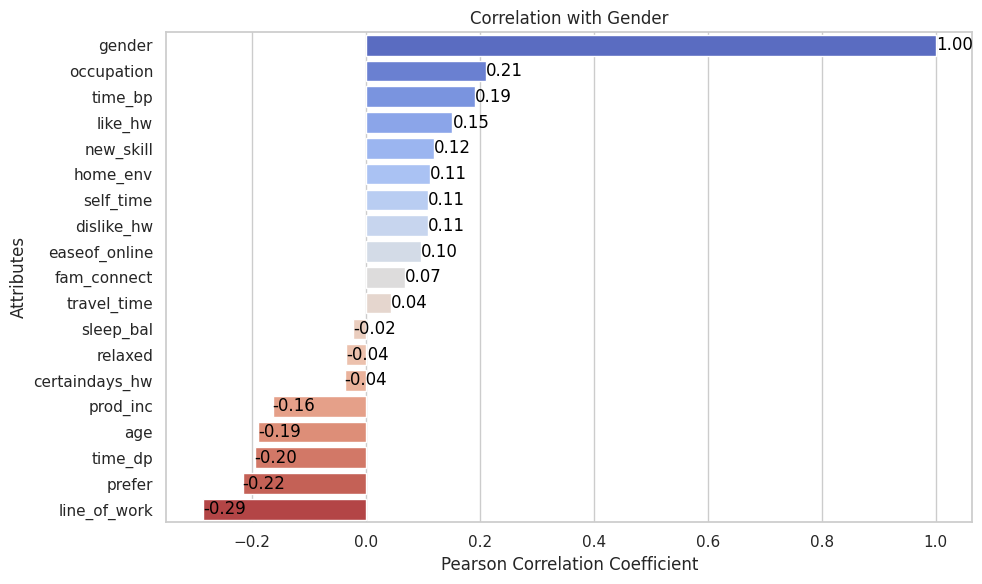

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pearson_corr = data.corr(method='pearson')
gender_corr = pearson_corr['gender'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=gender_corr.values, y=gender_corr.index, palette='coolwarm')
plt.title('Correlation with Gender')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Attributes')
for index, value in enumerate(gender_corr.values):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', color='black')
plt.tight_layout()
plt.savefig('GenderCorrelation.png', dpi=400)
plt.show()

In [ ]:
data = data.drop('new_skill', axis=1)
data = data.drop('home_env', axis=1)
data = data.drop('dislike_hw', axis=1)
data = data.drop('self_time', axis=1)
data = data.drop('easeof_online', axis=1)
data = data.drop('fam_connect', axis=1)
data = data.drop('travel_time', axis=1)
data = data.drop('sleep_bal', axis=1)
data = data.drop('relaxed', axis=1)
data = data.drop('certaindays_hw', axis=1)

In [ ]:
data.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'prod_inc', 'like_hw', 'prefer'],
      dtype='object')

Note: Classification comparisson use colorous

Note: drop the third class in the target attribute so that you can do binary classification. Because:the number is very low.

In [ ]:
data['gender'].value_counts()

1    649
0    518
2      8
Name: gender, dtype: int64

In [ ]:
data = data[data['gender'] != 2]

In [ ]:
print(data['gender'].value_counts())

1    649
0    518
Name: gender, dtype: int64


Move gender to the end of the attributes so that we can split the target and attribute.

In [ ]:
data['gender'] = data.pop('gender')

data.columns

Index(['age', 'occupation', 'line_of_work', 'time_bp', 'time_dp', 'prod_inc',
       'like_hw', 'prefer', 'gender'],
      dtype='object')

**Classification**

In [ ]:
models = []
Accuracy_score = []
precision = []
recall = []
f1Score = []
aucScore = []

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print('predictors', X)
print('target', y)

predictors [[0.         0.71428571 1.         ... 0.5        0.21428571 0.        ]
 [1.         0.85714286 1.         ... 0.25       1.         0.        ]
 [0.         0.71428571 1.         ... 1.         0.78571429 0.        ]
 ...
 [0.16666667 1.         0.375      ... 0.75       1.         0.        ]
 [0.16666667 1.         0.375      ... 0.5        1.         0.        ]
 [0.5        1.         0.375      ... 0.75       0.78571429 1.        ]]
target [1 1 1 ... 1 1 1]


[0.54700855 0.65811966 0.88034188 0.8974359  0.94871795 0.96581197
 0.84615385 0.94827586 0.93103448 0.93965517]
Accuracy: 0.86 (+/- 0.27)


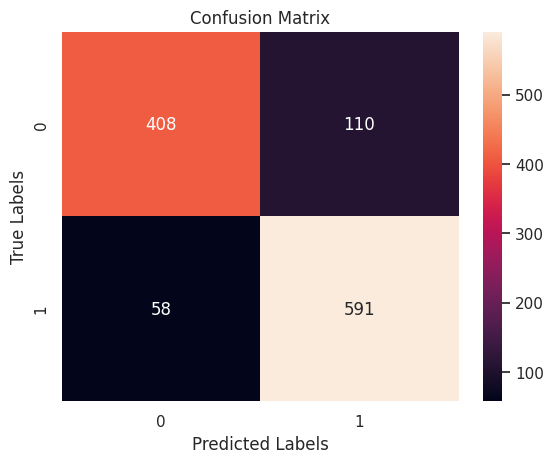

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       518
           1       0.84      0.91      0.88       649

    accuracy                           0.86      1167
   macro avg       0.86      0.85      0.85      1167
weighted avg       0.86      0.86      0.86      1167

Accuracy: 0.8560411311053985


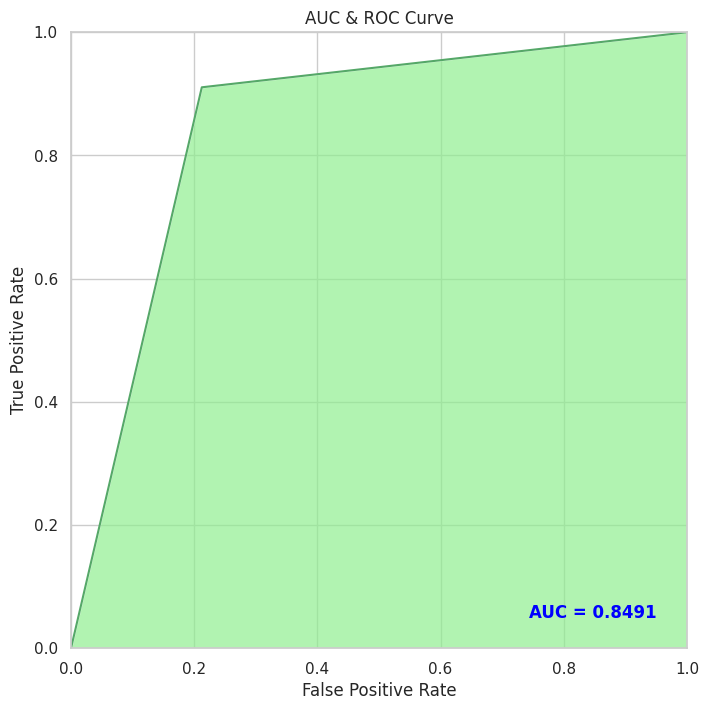

In [ ]:
MLPC = MLPClassifier(max_iter = 5000, random_state=0)
MLPCvScore = cross_val_score(MLPC, X, y, cv=10)
print(MLPCvScore)
print("Accuracy: %0.2f (+/- %0.2f)" % (MLPCvScore.mean(), MLPCvScore.std()*2))
y_pred = cross_val_predict(MLPC, X, y, cv=10)
conf_matrix = confusion_matrix(y, y_pred)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_mlp.png', dpi=400)
plt.show()
AccuracyMLPcv = accuracy_score(y, y_pred)
PrecisionMLPcv = precision_score(y, y_pred, average='weighted')
RecallMLPcv = recall_score(y, y_pred, average='weighted')
F1ScoreMLPcv = f1_score(y, y_pred, average='weighted')
AucScoreMlpcv = roc_auc_score(y,y_pred, average='weighted')
models.append('MLP')
Accuracy_score.append(AccuracyMLPcv)
precision.append(PrecisionMLPcv)
recall.append(RecallMLPcv)
f1Score.append(F1ScoreMLPcv)
aucScore.append(AucScoreMlpcv)
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
auc = AucScoreMlpcv
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y, y_pred)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('Roccurve_mlp.png', dpi=400)
plt.show()

[0.57264957 0.68376068 0.87179487 0.94871795 0.97435897 1.
 1.         1.         1.         1.        ]


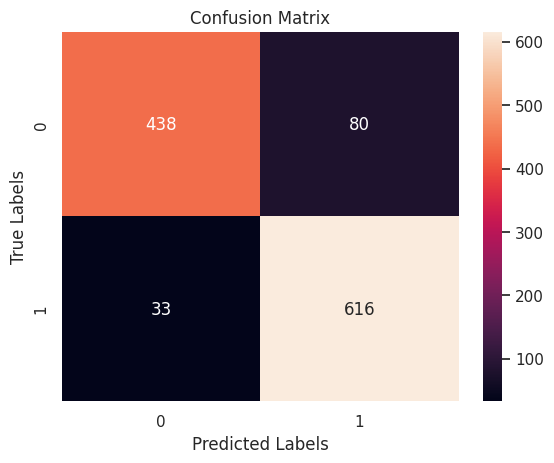

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       518
           1       0.89      0.95      0.92       649

    accuracy                           0.90      1167
   macro avg       0.91      0.90      0.90      1167
weighted avg       0.90      0.90      0.90      1167

Accuracy: 0.9031705227077977


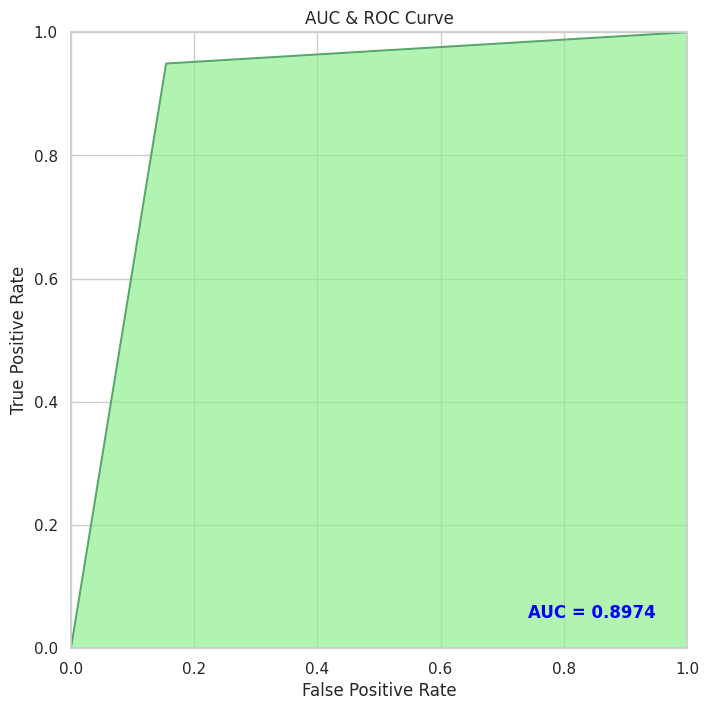

In [ ]:
Rf = RandomForestClassifier()
RfScore = cross_val_score(Rf, X, y, cv=10)
print(RfScore)
y_pred = cross_val_predict(Rf, X, y, cv=10)
conf_matrix = confusion_matrix(y, y_pred)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_random_forest.png', dpi=400)
plt.show()
AccuracyRFcv = accuracy_score(y, y_pred)
PrecisionRFcv = precision_score(y, y_pred, average='weighted')
RecallRFcv = recall_score(y, y_pred, average='weighted')
F1ScoreRFcv = f1_score(y, y_pred, average='weighted')
AucScoreRFcv = roc_auc_score(y,y_pred, average='weighted')
models.append('Random Forest')
Accuracy_score.append(AccuracyRFcv)
precision.append(PrecisionRFcv)
recall.append(RecallRFcv)
f1Score.append(F1ScoreRFcv)
aucScore.append(AucScoreRFcv)
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
auc = AucScoreRFcv
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y, y_pred)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('Roccurve_rf.png', dpi=400)
plt.show()

[0.57264957 0.62393162 0.66666667 0.76923077 0.74358974 0.75213675
 0.58974359 0.75       0.75862069 0.90517241]


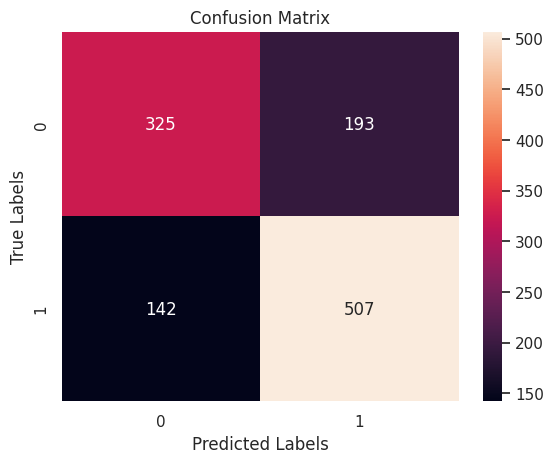

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       518
           1       0.72      0.78      0.75       649

    accuracy                           0.71      1167
   macro avg       0.71      0.70      0.71      1167
weighted avg       0.71      0.71      0.71      1167

Accuracy: 0.7129391602399314


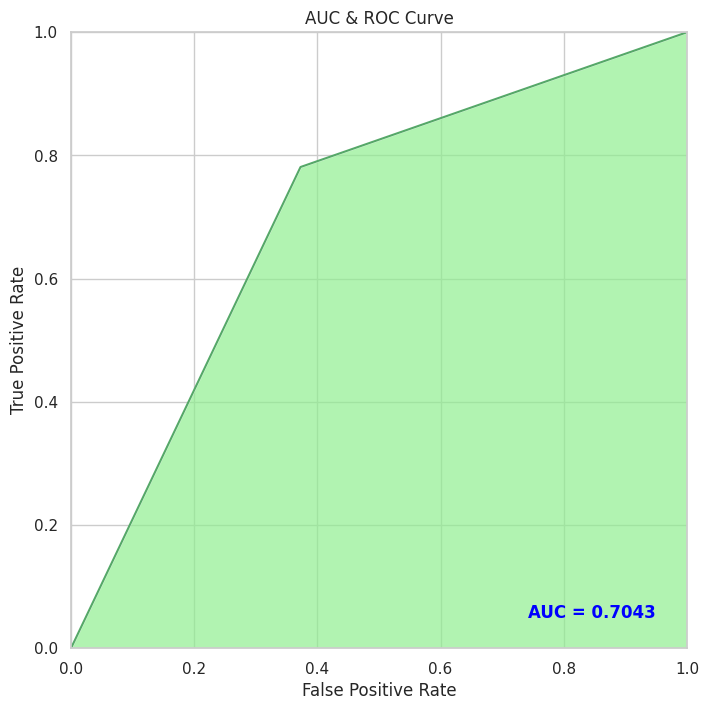

In [ ]:
LR = LogisticRegression()
LRScore = cross_val_score(LR, X, y, cv=10)
print(LRScore)
y_pred = cross_val_predict(LR, X, y, cv=10)
conf_matrix = confusion_matrix(y, y_pred)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_LR.png', dpi=400)
plt.show()
AccuracyLRcv = accuracy_score(y, y_pred)
PrecisionLRcv = precision_score(y, y_pred, average='weighted')
RecallLRcv = recall_score(y, y_pred, average='weighted')
F1ScoreLRcv = f1_score(y, y_pred, average='weighted')
AucScoreLRcv = roc_auc_score(y,y_pred, average='weighted')
models.append('Logistic Regression')
Accuracy_score.append(AccuracyLRcv)
precision.append(PrecisionLRcv)
recall.append(RecallLRcv)
f1Score.append(F1ScoreLRcv)
aucScore.append(AucScoreLRcv)
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
auc = AucScoreLRcv
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y, y_pred)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('Roccurve_LR.png', dpi=400)
plt.show()

[0.56410256 0.70940171 0.85470085 0.88034188 0.93162393 0.95726496
 0.8034188  0.8362069  0.9137931  0.93965517]


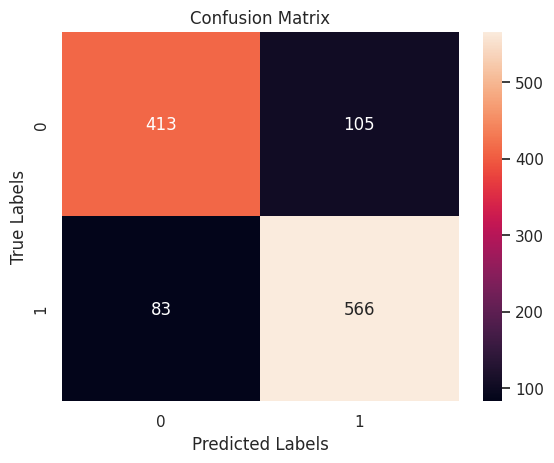

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       518
           1       0.84      0.87      0.86       649

    accuracy                           0.84      1167
   macro avg       0.84      0.83      0.84      1167
weighted avg       0.84      0.84      0.84      1167

Accuracy: 0.8389031705227078


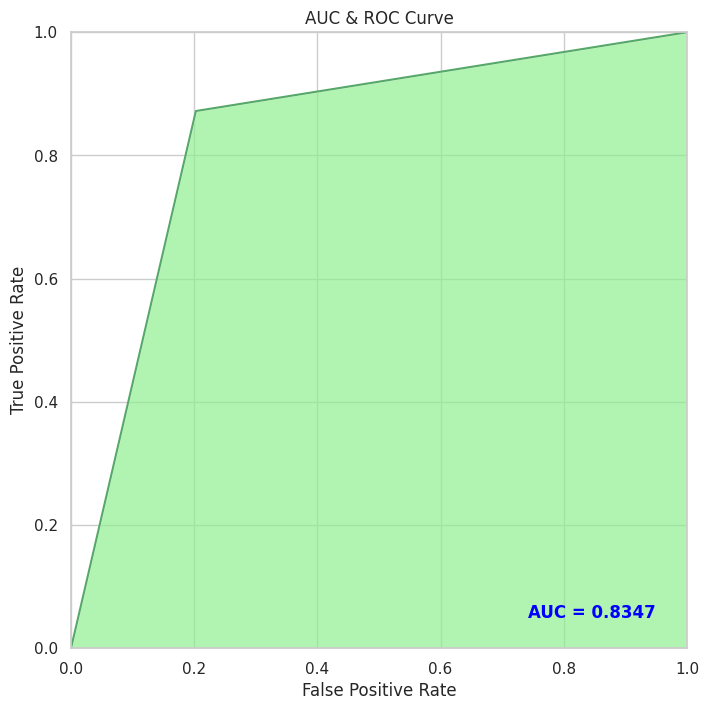

In [ ]:
ADA = AdaBoostClassifier()
ADAScore = cross_val_score(ADA, X, y, cv=10)
print(ADAScore)
y_pred = cross_val_predict(ADA, X, y, cv=10)
conf_matrix = confusion_matrix(y, y_pred)
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_ADA.png', dpi=400)
plt.show()
AccuracyADAcv = accuracy_score(y, y_pred)
PrecisionADAcv = precision_score(y, y_pred, average='weighted')
RecallADAcv = recall_score(y, y_pred, average='weighted')
F1ScoreADAcv = f1_score(y, y_pred, average='weighted')
AucScoreADAcv = roc_auc_score(y,y_pred, average='weighted')
models.append('ADA Boost')
Accuracy_score.append(AccuracyADAcv)
precision.append(PrecisionADAcv)
recall.append(RecallADAcv)
f1Score.append(F1ScoreADAcv)
aucScore.append(AucScoreADAcv)
print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
auc = AucScoreADAcv
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y, y_pred)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('Roccurve_ADA.png', dpi=400)
plt.show()

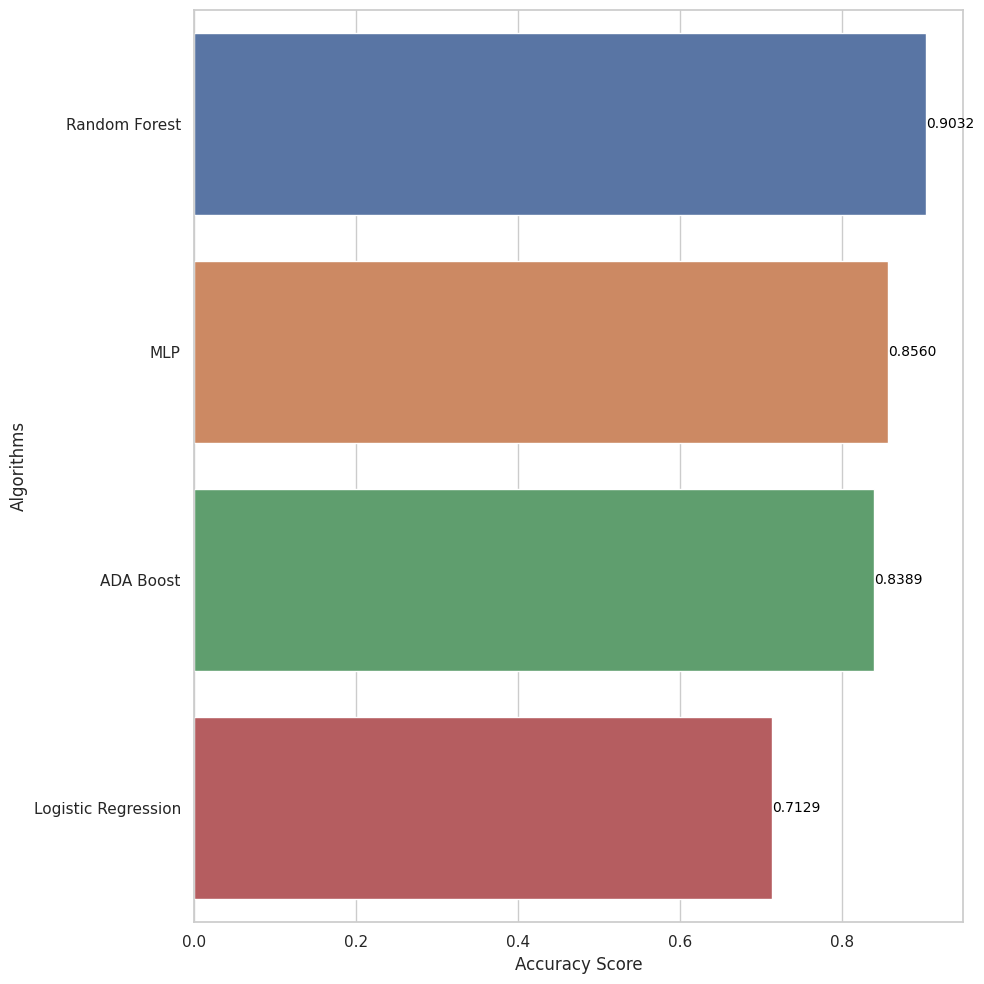

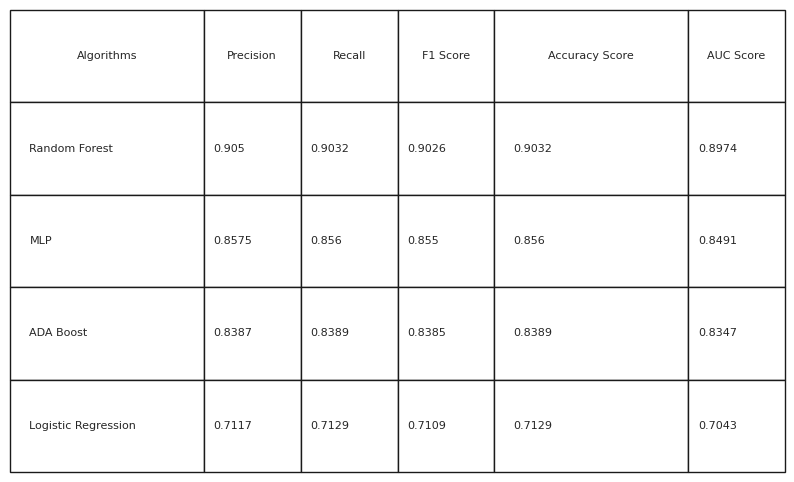

In [ ]:
compare_models = pd.DataFrame({'Algorithms': models, 'Precision': precision, 'Recall': recall, 'F1 Score': f1Score, 'Accuracy Score': Accuracy_score, 'AUC Score': aucScore})
compare_models = compare_models.round(4)
compare_models = compare_models.sort_values(by='Accuracy Score', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 10))
barplot = sns.barplot(x='Accuracy Score', y='Algorithms', data=compare_models)

for index, value in enumerate(compare_models['Accuracy Score']):
    barplot.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.savefig('accuracy_comparison_plot.png', dpi=400)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

col_widths = [0.2, 0.1, 0.1, 0.1, 0.2, 0.1]

table = ax.table(cellText=compare_models.values, colLabels=compare_models.columns, cellLoc='left', loc='left', bbox=[0, 0, 1, 1], colWidths=col_widths)

plt.savefig('model_comparison_table.png', dpi=400)
plt.show()

**Regression**

In [ ]:
dataReg = pd.read_csv('psyco.csv')

In [ ]:
dataReg.isnull().sum()

age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill           0
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64

In [ ]:
dataReg['line_of_work'].fillna('other', inplace=True)
print(dataReg['line_of_work'].value_counts())

other                  696
Teaching               217
Engineering            116
Management              66
Other                   40
Government Employee     35
Architect                3
APSPDCL                  1
Architecture             1
Name: line_of_work, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
dataReg['age'] = LE.fit_transform(dataReg['age'])
dataReg['gender'] = LE.fit_transform(dataReg['gender'])
dataReg['occupation'] = LE.fit_transform(dataReg['occupation'])
dataReg['line_of_work'] = LE.fit_transform(dataReg['line_of_work'])
dataReg['like_hw'] = LE.fit_transform(dataReg['like_hw'])
dataReg['dislike_hw'] = LE.fit_transform(dataReg['dislike_hw'])
dataReg['prefer'] = LE.fit_transform(dataReg['prefer'])
dataReg['certaindays_hw'] = LE.fit_transform(dataReg['certaindays_hw'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['age','gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw']

scaler = MinMaxScaler()

dataReg[columns_to_scale] = scaler.fit_transform(dataReg[columns_to_scale])

print(dataReg.head())

   age  gender  occupation  line_of_work  time_bp  time_dp  travel_time  \
0  0.0     0.5    0.714286           1.0    0.375    0.125          0.0   
1  1.0     0.5    0.857143           1.0    0.375    0.875          0.0   
2  0.0     0.5    0.714286           1.0    0.375    0.375          0.4   
3  0.0     0.5    0.714286           1.0    0.375    0.375          0.4   
4  0.0     0.0    0.714286           1.0    0.375    0.375          0.4   

   easeof_online  home_env  prod_inc  sleep_bal  new_skill  fam_connect  \
0           0.50      0.50      0.50       0.50       0.75         1.00   
1           0.75      0.25      0.25       0.75       0.00         1.00   
2           0.25      0.25      1.00       0.50       0.75         0.75   
3           0.50      0.00      0.50       1.00       0.75         0.50   
4           0.25      0.25      0.50       0.50       0.50         0.50   

   relaxed  self_time   like_hw  dislike_hw  prefer  certaindays_hw  
0     0.25       -0.5  0.214

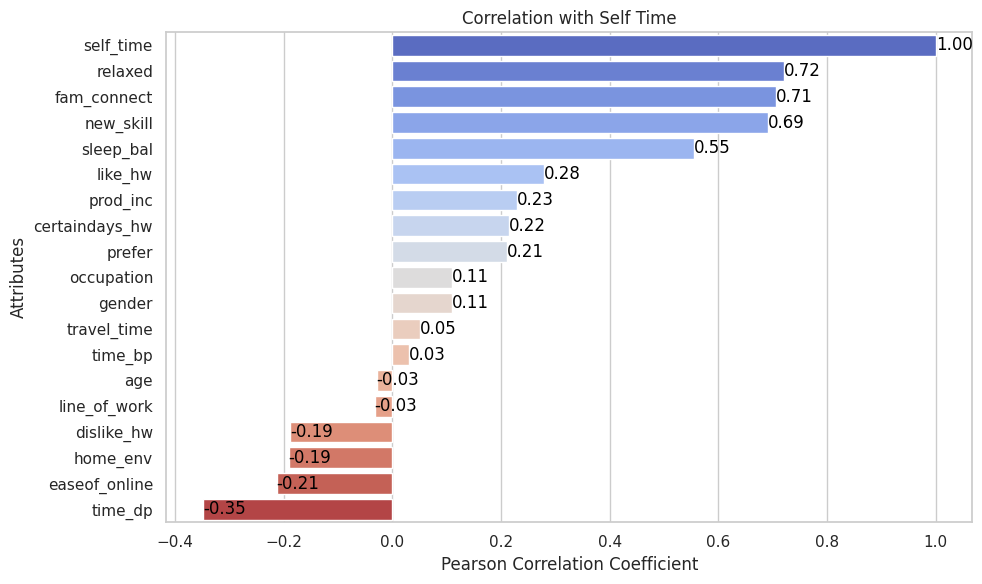

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pearson_corr = dataReg.corr(method='pearson')
selfTime_corr = pearson_corr['self_time'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=selfTime_corr.values, y=selfTime_corr.index, palette='coolwarm')
plt.title('Correlation with Self Time')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Attributes')
for index, value in enumerate(selfTime_corr.values):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', color='black')
plt.tight_layout()
plt.savefig('SelfTimeCorrelation.png', dpi=400)
plt.show()

In [ ]:
dataReg = dataReg.drop('prod_inc', axis=1)
dataReg = dataReg.drop('certaindays_hw', axis=1)
dataReg = dataReg.drop('prefer', axis=1)
dataReg = dataReg.drop('occupation', axis=1)
dataReg = dataReg.drop('gender', axis=1)
dataReg = dataReg.drop('travel_time', axis=1)
dataReg = dataReg.drop('time_bp', axis=1)
dataReg = dataReg.drop('age', axis=1)
dataReg = dataReg.drop('line_of_work', axis=1)
dataReg = dataReg.drop('dislike_hw', axis=1)
dataReg = dataReg.drop('home_env', axis=1)
dataReg = dataReg.drop('easeof_online', axis=1)

In [ ]:
models = []
MAE = []
MSE = []
RMSE = []
R2 = []
Adjusted_R2 = []

In [ ]:
dataReg['self_time'] = dataReg.pop('self_time')
dataReg.columns

Index(['time_dp', 'sleep_bal', 'new_skill', 'fam_connect', 'relaxed',
       'like_hw', 'self_time'],
      dtype='object')

In [ ]:
X = dataReg.iloc[:,:-1].values
y = dataReg.iloc[:,-1].values
print('predictors', X)
print('target', y)

predictors [[0.125      0.5        0.75       1.         0.25       0.21428571]
 [0.875      0.75       0.         1.         1.         1.        ]
 [0.375      0.5        0.75       0.75       0.75       0.78571429]
 ...
 [0.875      0.75       0.75       0.75       0.5        1.        ]
 [1.         0.5        0.5        0.         0.5        1.        ]
 [0.125      0.25       0.75       0.75       0.75       0.78571429]]
target [-0.5  1.   0.5 ...  0.  -0.5  0.5]


In [ ]:
from sklearn.linear_model import LinearRegression
LRR = LinearRegression()
LRRScore = cross_val_score(LRR, X, y, cv=10)
print(LRRScore)
y_pred = cross_val_predict(LRR, X, y, cv=10)
models.append('LinearRegression')
MAE.append(metrics.mean_absolute_error(y, y_pred))
MSE.append(metrics.mean_squared_error(y, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y, y_pred)))
R2.append(r2_score(y, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')
print('R2 score:', r2_score(y, y_pred))
adj_r2 = 1-(1-r2_score(y, y_pred))*(len(y_pred)-1)/(len(y_pred)-X.shape[1]-1)
Adjusted_R2.append(adj_r2)
print('Adjusted R2 score:',adj_r2)

[0.57803166 0.52507557 0.58817243 0.6792004  0.68759999 0.62532307
 0.64504845 0.56112729 0.60138188 0.7856557 ]
Mean Absolute Error: 0.25425174749714796
Mean Squared Error: 0.11115178701031743
Root Mean Squared Error: 0.33339434159913006 

R2 score: 0.6205151347627721
Adjusted R2 score: 0.6185657262084713


In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTRC = DecisionTreeRegressor(max_depth=5)
score = cross_val_score(DTRC, X, y, cv=10)
print(score)
y_pred = cross_val_predict(DTRC, X, y, cv=10)
models.append('RegressionTree')
MAE.append(metrics.mean_absolute_error(y, y_pred))
MSE.append(metrics.mean_squared_error(y, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y, y_pred)))
R2.append(r2_score(y, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')
print('R2 score:', r2_score(y, y_pred))
adj_r2 = 1-(1-r2_score(y, y_pred))*(len(y_pred)-1)/(len(y_pred)-X.shape[1]-1)
Adjusted_R2.append(adj_r2)
print('Adjusted R2 score:',adj_r2)

[0.42564846 0.36941095 0.52532347 0.65383844 0.83474664 0.84569027
 0.86822266 0.66991704 0.82386715 0.77393217]
Mean Absolute Error: 0.20852972743940845
Mean Squared Error: 0.09977270750131945
Root Mean Squared Error: 0.31586818057746724 

R2 score: 0.6593646087131547
Adjusted R2 score: 0.6576147693743525


In [ ]:
from sklearn.svm import SVR
SVRP = SVR(kernel='poly')
SVRC = SVR(kernel='poly')
SvrCScore = cross_val_score(SVRC, X, y, cv=10)
print(SvrCScore)
y_pred = cross_val_predict(SVRC, X, y, cv=10)
models.append('SVR')
MAE.append(metrics.mean_absolute_error(y, y_pred))
MSE.append(metrics.mean_squared_error(y, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y, y_pred)))
R2.append(r2_score(y, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')
print('R2 score:', r2_score(y, y_pred))
adj_r2 = 1-(1-r2_score(y, y_pred))*(len(y_pred)-1)/(len(y_pred)-X.shape[1]-1)
Adjusted_R2.append(adj_r2)
print('Adjusted R2 score:',adj_r2)

[-0.13905425  0.18048049  0.1390937   0.2913688   0.80090869  0.66844392
  0.75389441  0.7752827   0.58212213  0.21964334]
Mean Absolute Error: 0.2794472227171017
Mean Squared Error: 0.17767240240716212
Root Mean Squared Error: 0.4215120430155728 

R2 score: 0.3934061745890063
Adjusted R2 score: 0.3902901104173745


In [ ]:
compare_models = pd.DataFrame({ 'Algorithms': models, 'Mean Absolute Error': MAE, 'Mean Squared Error': MSE, 'Root Mean Squared Error': RMSE, 'R2_Score': R2, 'Adjusted R2_Score': Adjusted_R2})
compare_models.sort_values(by = 'Adjusted R2_Score', ascending = False).reset_index(drop=True)

,Algorithms,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2_Score,Adjusted R2_Score
0,RegressionTree,0.208530,0.099773,0.315868,0.659365,0.657615
1,LinearRegression,0.254252,0.111152,0.333394,0.620515,0.618566
2,SVR,0.279447,0.177672,0.421512,0.393406,0.390290


**Clustering**

In [ ]:
dataClus = pd.read_csv('psyco.csv')

In [ ]:
dataClus.isnull().sum()

age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill           0
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64

In [ ]:
dataClus['line_of_work'].fillna('other', inplace=True)
print(dataClus['line_of_work'].value_counts())

other                  696
Teaching               217
Engineering            116
Management              66
Other                   40
Government Employee     35
Architect                3
APSPDCL                  1
Architecture             1
Name: line_of_work, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
dataClus['age'] = LE.fit_transform(dataClus['age'])
dataClus['gender'] = LE.fit_transform(dataClus['gender'])
dataClus['occupation'] = LE.fit_transform(dataClus['occupation'])
dataClus['line_of_work'] = LE.fit_transform(dataClus['line_of_work'])
dataClus['like_hw'] = LE.fit_transform(dataClus['like_hw'])
dataClus['dislike_hw'] = LE.fit_transform(dataClus['dislike_hw'])
dataClus['prefer'] = LE.fit_transform(dataClus['prefer'])
dataClus['certaindays_hw'] = LE.fit_transform(dataClus['certaindays_hw'])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataClus.values)
scaled_features_data = pd.DataFrame(scaled_features, index=dataClus.index, columns=dataClus.columns)
scaled_features_data.describe()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
count,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03
mean,-6.047172e-17,-4.837738e-17,-1.148963e-16,-6.349531e-17,-3.023586e-18,1.209434e-17,-7.558965e-17,9.675476e-17,1.814152e-17,9.070758e-18,-3.023586e-18,-2.872407e-17,4.837738e-17,-2.418869e-17,3.930662e-17,4.837738e-17,-2.418869e-17,1.814152e-17,-1.088491e-16
std,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00
min,-1.071751e+00,-1.111503e+00,-2.177181e+00,-4.108962e+00,-1.703799e+00,-1.495519e+00,-7.400447e-01,-1.210365e+00,-1.418586e+00,-1.641023e+00,-1.434999e+00,-1.782386e+00,-1.835929e+00,-1.653567e+00,-2.001055e+00,-1.876769e+00,-1.485618e+00,-6.367907e-01,-1.486731e+00
25%,-1.071751e+00,-1.111503e+00,-8.450227e-01,3.781254e-02,-1.204929e+00,-1.118996e+00,-7.400447e-01,-1.210365e+00,-6.090480e-01,-8.277790e-01,-6.297825e-01,-1.005279e+00,-3.793344e-01,-8.553167e-01,-1.077189e+00,-1.171706e+00,-6.954851e-01,-6.367907e-01,-1.486731e+00
50%,-5.340452e-01,8.524305e-01,4.308255e-02,6.302089e-01,-2.071901e-01,3.870983e-01,-7.400447e-01,-4.211426e-01,2.004898e-01,-1.453458e-02,1.754345e-01,5.489351e-01,3.489628e-01,-5.706640e-02,-1.533225e-01,3.400307e-03,-1.028854e-01,-6.367907e-01,-2.777975e-01
75%,5.413671e-01,8.524305e-01,9.311878e-01,6.302089e-01,7.905491e-01,3.870983e-01,6.624593e-01,1.157303e+00,1.010028e+00,7.987098e-01,9.806515e-01,5.489351e-01,1.077260e+00,7.411839e-01,7.705436e-01,7.084640e-01,8.847808e-01,1.570375e+00,9.311360e-01
max,2.154486e+00,2.816364e+00,9.311878e-01,6.302089e-01,2.287158e+00,1.516669e+00,2.766215e+00,1.946525e+00,1.819565e+00,1.611954e+00,1.785868e+00,1.326042e+00,1.077260e+00,1.539434e+00,1.694410e+00,1.413528e+00,1.279847e+00,1.570375e+00,9.311360e-01


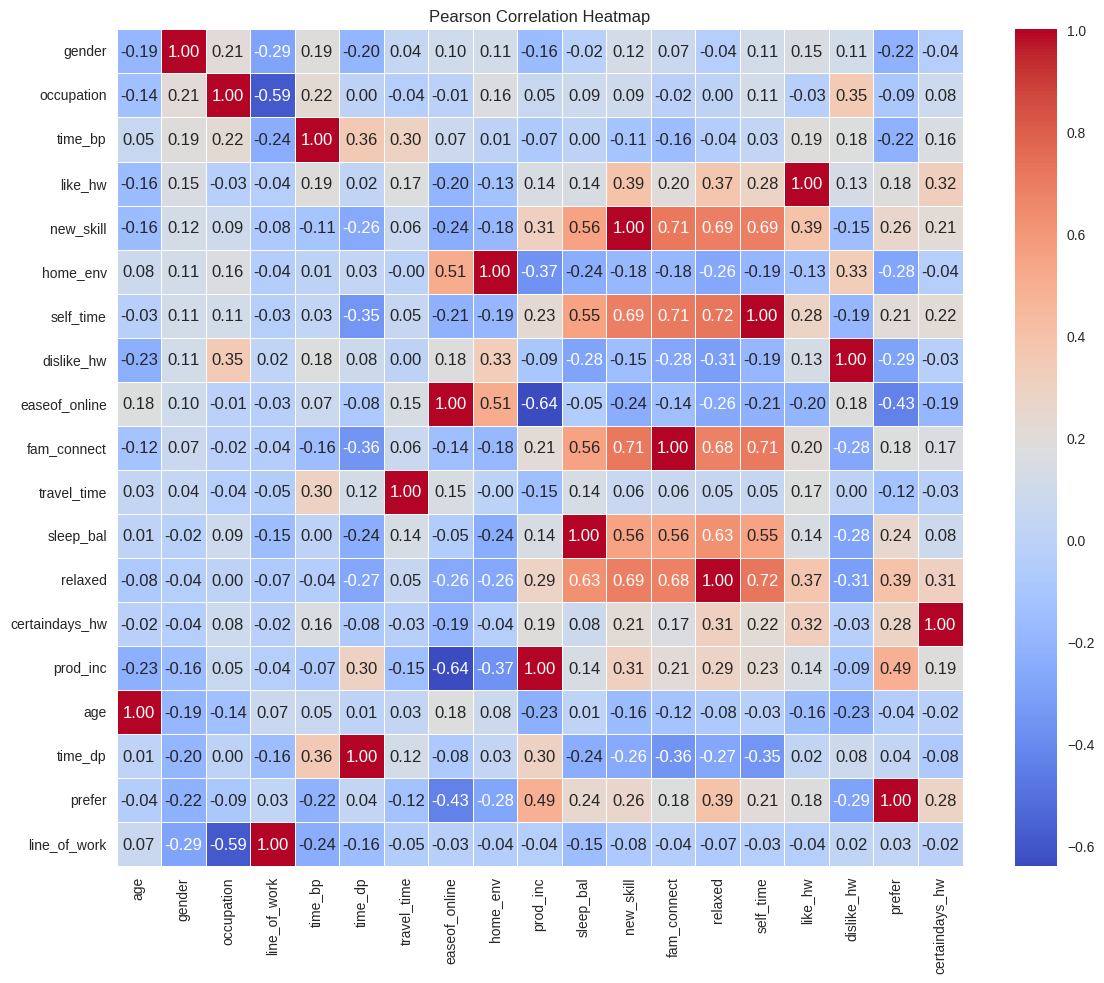

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
pearson_corr = dataClus.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(sorted_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.savefig('pearsonCorrelation.png', dpi=400)
plt.show()

In [ ]:
dataClus = dataClus.drop('certaindays_hw', axis=1)
dataClus = dataClus.drop('gender', axis=1)
dataClus = dataClus.drop('travel_time', axis=1)
dataClus = dataClus.drop('time_bp', axis=1)
dataClus = dataClus.drop('age', axis=1)
dataClus = dataClus.drop('line_of_work', axis=1)
dataClus = dataClus.drop('dislike_hw', axis=1)
dataClus = dataClus.drop('time_dp', axis=1)

In [ ]:
dataClus.columns

Index(['occupation', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'prefer'],
      dtype='object')

In [ ]:
pip install yellowbrick

**Kmeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

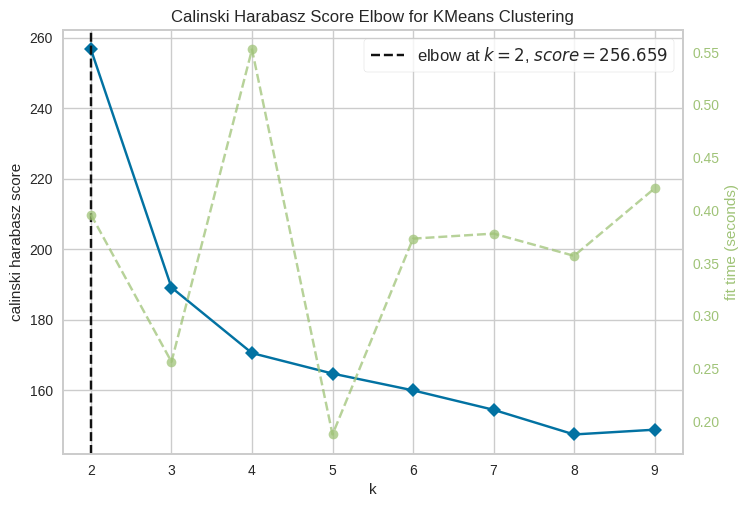

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')
visualizer.fit(scaled_features_data)
plt.savefig('elbow_visualization.png', dpi=400)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_features_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[ 0.11393775, -0.03742786, -0.13905668,  0.14706211,  0.0497793 ,
         0.26019366, -0.16142815,  0.262683  ,  0.34978452, -0.19812871,
        -0.61442061, -0.65687783, -0.62017031, -0.71191082, -0.63655287,
        -0.323537  ,  0.27522275, -0.30343503, -0.1663219 ],
       [-0.13125796,  0.04311745,  0.16019533, -0.16941771, -0.05734648,
        -0.2997469 ,  0.18596759, -0.30261466, -0.40295689,  0.22824718,
         0.70782154,  0.75673289,  0.71444528,  0.8201317 ,  0.73331823,
         0.37271936, -0.31706064,  0.3495616 ,  0.19160526]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


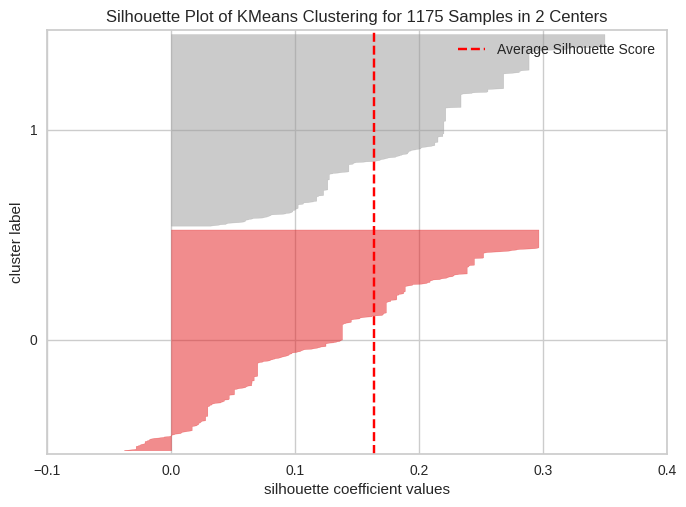

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1175 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans_silhouette = silhouette_score(scaled_features_data, kmeans.labels_).round(2)
kmeans_silhouette
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(scaled_features_data)
plt.savefig('silhoueteScoreKmeans.png', dpi=400)
visualizer.poof()

In [ ]:
kmeans.labels_
scaled_features_data['cluster'] = kmeans.labels_
kmeans.labels_ == 0
cluster1=scaled_features_data.query("cluster == 0")
cluster2=scaled_features_data.query("cluster == 1")

In [ ]:
cluster1.shape

(629, 20)

In [ ]:
cluster2.shape

(546, 20)

In [ ]:
cluster1.describe()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,cluster
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.0
mean,0.113938,-0.037428,-0.139057,0.147062,0.049779,0.260194,-0.161428,0.262683,0.349785,-0.198129,-0.614421,-0.656878,-0.620170,-0.711911,-0.636553,-0.323537,0.275223,-0.303435,-0.166322,0.0
std,1.072099,1.015381,0.904600,0.951050,1.131924,1.072841,0.965622,0.973132,1.040075,0.983216,0.699387,0.810761,0.939577,0.653349,0.752754,0.985210,1.071007,0.790974,0.987073,0.0
min,-1.071751,-1.111503,-2.177181,-3.516566,-1.703799,-1.495519,-0.740045,-1.210365,-1.418586,-1.641023,-1.434999,-1.782386,-1.835929,-1.653567,-2.001055,-1.876769,-1.485618,-0.636791,-1.486731,0.0
25%,-1.071751,-1.111503,-0.845023,0.037813,-1.204929,-0.365949,-0.740045,-0.421143,-0.609048,-0.827779,-1.434999,-1.005279,-1.835929,-0.855317,-1.077189,-1.171706,-0.497952,-0.636791,-1.486731,0.0
50%,0.003661,0.852431,0.043083,0.630209,-0.207190,0.387098,-0.740045,0.368080,0.200490,-0.014535,-0.629782,-1.005279,-0.379334,-0.855317,-1.077189,-0.231621,0.687248,-0.636791,-0.277797,0.0
75%,1.079073,0.852431,0.931188,0.630209,0.790549,1.516669,0.662459,1.157303,1.010028,0.798710,0.175435,-0.228172,0.348963,-0.057066,-0.153322,0.708464,1.279847,-0.636791,0.931136,0.0
max,2.154486,2.816364,0.931188,0.630209,2.287158,1.516669,2.766215,1.946525,1.819565,1.611954,1.785868,1.326042,1.077260,1.539434,1.694410,1.413528,1.279847,1.570375,0.931136,0.0


In [ ]:
cluster2.describe()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,cluster
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.0
mean,-0.131258,0.043117,0.160195,-0.169418,-0.057346,-0.299747,0.185968,-0.302615,-0.402957,0.228247,0.707822,0.756733,0.714445,0.820132,0.733318,0.372719,-0.317061,0.349562,0.191605,1.0
std,0.894024,0.982075,1.079358,1.029564,0.820628,0.813350,1.008371,0.945186,0.778193,0.971868,0.809135,0.571694,0.428316,0.636638,0.704723,0.881769,0.803793,1.098345,0.982122,0.0
min,-1.071751,-1.111503,-2.177181,-4.108962,-1.703799,-1.495519,-0.740045,-1.210365,-1.418586,-1.641023,-1.434999,-1.782386,-1.107632,-1.653567,-1.077189,-1.876769,-1.485618,-0.636791,-1.486731,1.0
25%,-1.071751,-1.111503,0.043083,-1.146980,-0.207190,-1.118996,-0.740045,-1.210365,-1.418586,-0.014535,0.175435,0.548935,0.348963,0.741184,-0.153322,-0.231621,-0.695485,-0.636791,-0.277797,1.0
50%,-0.534045,0.852431,0.931188,0.037813,-0.207190,-0.365949,0.662459,-0.421143,-0.609048,0.798710,0.980651,0.548935,1.077260,0.741184,0.770544,0.708464,-0.300419,-0.636791,0.931136,1.0
75%,0.541367,0.852431,0.931188,0.630209,0.790549,0.387098,0.662459,0.368080,0.200490,0.798710,0.980651,1.326042,1.077260,1.539434,1.694410,1.178506,-0.102885,1.570375,0.931136,1.0
max,2.154486,2.816364,0.931188,0.630209,2.287158,1.516669,2.766215,1.946525,1.819565,1.611954,1.785868,1.326042,1.077260,1.539434,1.694410,1.413528,1.279847,1.570375,0.931136,1.0


In [ ]:
kmeans.cluster_centers_

array([[ 0.11393775, -0.03742786, -0.13905668,  0.14706211,  0.0497793 ,
         0.26019366, -0.16142815,  0.262683  ,  0.34978452, -0.19812871,
        -0.61442061, -0.65687783, -0.62017031, -0.71191082, -0.63655287,
        -0.323537  ,  0.27522275, -0.30343503, -0.1663219 ],
       [-0.13125796,  0.04311745,  0.16019533, -0.16941771, -0.05734648,
        -0.2997469 ,  0.18596759, -0.30261466, -0.40295689,  0.22824718,
         0.70782154,  0.75673289,  0.71444528,  0.8201317 ,  0.73331823,
         0.37271936, -0.31706064,  0.3495616 ,  0.19160526]])

In [ ]:
cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]

In [ ]:
cluster1_mean

array([ 0.11393775, -0.03742786, -0.13905668,  0.14706211,  0.0497793 ,
        0.26019366, -0.16142815,  0.262683  ,  0.34978452, -0.19812871,
       -0.61442061, -0.65687783, -0.62017031, -0.71191082, -0.63655287,
       -0.323537  ,  0.27522275, -0.30343503, -0.1663219 ])

In [ ]:
cluster2_mean

array([-0.13125796,  0.04311745,  0.16019533, -0.16941771, -0.05734648,
       -0.2997469 ,  0.18596759, -0.30261466, -0.40295689,  0.22824718,
        0.70782154,  0.75673289,  0.71444528,  0.8201317 ,  0.73331823,
        0.37271936, -0.31706064,  0.3495616 ,  0.19160526])

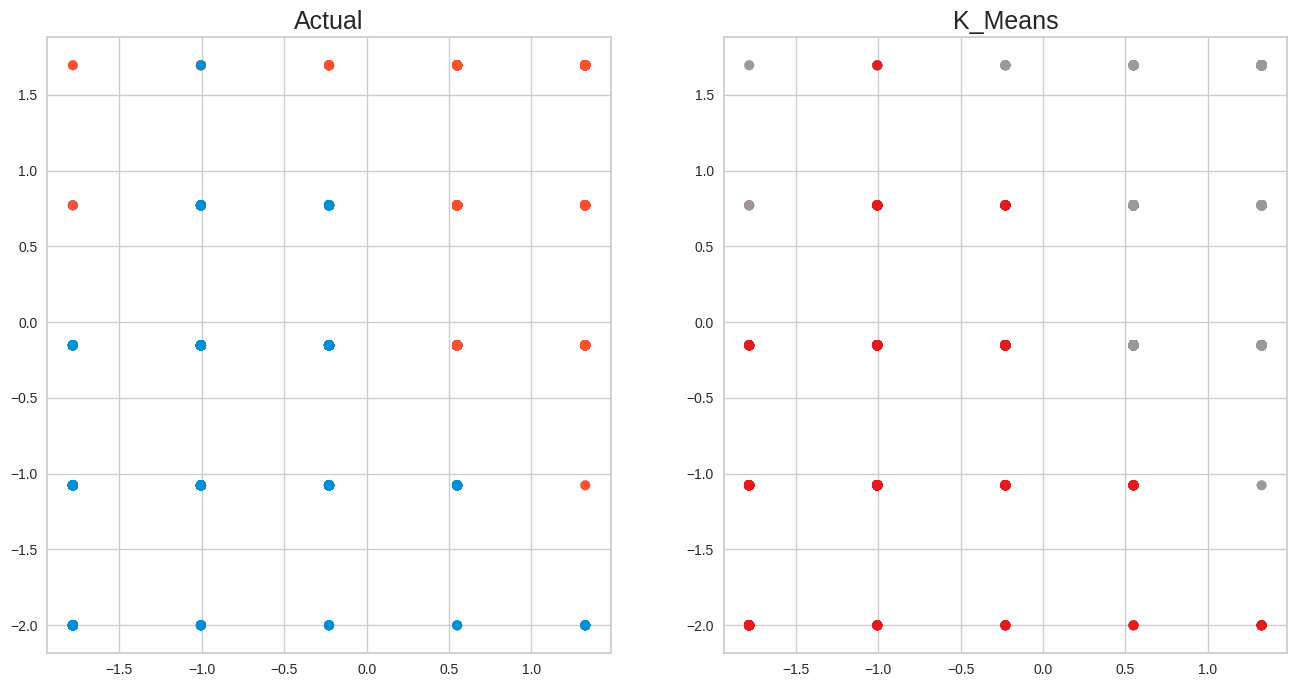

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

fte_colors = {0: "#008fd5", 1: "#fc4f30"}

km_colors = [fte_colors[label] for label in kmeans.labels_]

axes[0].scatter(scaled_features_data['new_skill'], scaled_features_data['self_time'], c=km_colors)
axes[1].scatter(scaled_features_data['new_skill'], scaled_features_data['self_time'], c=kmeans.labels_, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)
plt.savefig('clusterVisualisation.png', dpi=400)

**Agglomerative**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X = scaled_features_data
cluster= AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
cluster.fit(X)
labels = cluster.labels_

# Get the number of clusters
num_clusters = cluster.n_clusters_

print(f"Number of clusters: {num_clusters}")

Number of clusters: 1175


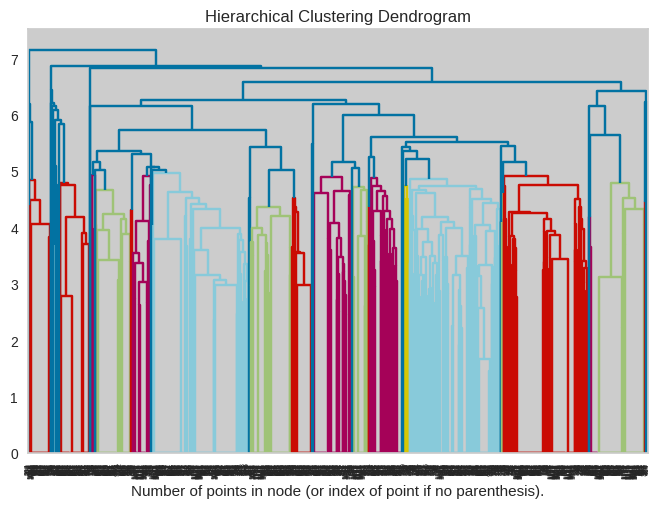

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(cluster)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig('Dendrogram.png', dpi=400)
plt.show()

In [ ]:
cluster = AgglomerativeClustering( linkage='average')
cluster.fit(X)

AgglomerativeClustering(linkage='average')

In [ ]:
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Agglomerative_silhouette = silhouette_score(scaled_features_data, cluster.labels_).round(2)
Agglomerative_silhouette

0.18

In [ ]:
X['cluster_no'] = cluster.labels_

In [ ]:
cluster1A = X.query("cluster_no ==0")
cluster2A = X.query("cluster_no == 1")

In [ ]:
len(cluster1A.value_counts())

405

In [ ]:
len(cluster2A.value_counts())

8

In [ ]:
cluster1A_mean = np.array(cluster1A.mean())
cluster2A_mean = np.array(cluster2A.mean())

In [ ]:
algorithms = ['K-Means', 'Agglomerative']
Silhouette_Score = [kmeans_silhouette, Agglomerative_silhouette]
cluster1_coverage = [cluster1.shape[0], len(cluster1A.value_counts())]
cluster2_coverage = [cluster2.shape[0], len(cluster2A.value_counts())]
compare_models = pd.DataFrame({ 'Algorithms': algorithms, 'Cluster 1 Coverage': cluster1_coverage, 'Cluster 2 Coverage': cluster2_coverage, 'Silhouette Score': Silhouette_Score})
compare_models.sort_values(by = 'Silhouette Score', ascending = False).reset_index(drop=True)

,Algorithms,Cluster 1 Coverage,Cluster 2 Coverage,Silhouette Score
0,Agglomerative,405,8,0.18
1,K-Means,629,546,0.16
